# Project Song Recommender | Top 100 & Spotify

---

## Billboard TOP 100 

Billboard maintains a weekly Top 100 of "hot" songs here: https://www.billboard.com/charts/hot-100. Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.

In [129]:
# importing libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
from requests.exceptions import ReadTimeout
import random
import numpy as np

In [2]:
# find url and store it in a variable
url = "https://www.billboard.com/charts/hot-100"

In [3]:
# download html with a get request
response = requests.get(url)

In [4]:
#status_code request
response.status_code

200

In [5]:
#store it in a soup object
soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
songs=soup.select("span.chart-element__information__song")
songs

[<span class="chart-element__information__song text--truncate color--primary">Save Your Tears</span>,
 <span class="chart-element__information__song text--truncate color--primary">Leave The Door Open</span>,
 <span class="chart-element__information__song text--truncate color--primary">Peaches</span>,
 <span class="chart-element__information__song text--truncate color--primary">Rapstar</span>,
 <span class="chart-element__information__song text--truncate color--primary">Levitating</span>,
 <span class="chart-element__information__song text--truncate color--primary">Kiss Me More</span>,
 <span class="chart-element__information__song text--truncate color--primary">Montero (Call Me By Your Name)</span>,
 <span class="chart-element__information__song text--truncate color--primary">Astronaut In The Ocean</span>,
 <span class="chart-element__information__song text--truncate color--primary">Up</span>,
 <span class="chart-element__information__song text--truncate color--primary">Drivers License

In [7]:
artists = soup.select("span.chart-element__information__artist")
artists

[<span class="chart-element__information__artist text--truncate color--secondary">The Weeknd &amp; Ariana Grande</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Silk Sonic (Bruno Mars &amp; Anderson .Paak)</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Justin Bieber Featuring Daniel Caesar &amp; Giveon</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Polo G</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Dua Lipa Featuring DaBaby</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Doja Cat Featuring SZA</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Lil Nas X</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Masked Wolf</span>,
 <span class="chart-element__information__artist text--truncate color--seco

In [8]:
#loop for appending all artists and songs in their respective list
titles=[]
artists=[]

for i in range(len(songs)):
    titles.append(soup.select("span.chart-element__information__song")[i].text.lower())
    artists.append(soup.select("span.chart-element__information__artist")[i].text.lower())

In [9]:
#create dataframe with title and artists
data_100 = pd.DataFrame({'title':titles,'artists':artists})
data_100

,title,artists
0,save your tears,the weeknd & ariana grande
1,leave the door open,silk sonic (bruno mars & anderson .paak)
2,peaches,justin bieber featuring daniel caesar & giveon
3,rapstar,polo g
4,levitating,dua lipa featuring dababy
...,...,...
95,4 da gang,42 dugg & roddy ricch
96,blame it on you,jason aldean
97,wasted on you,morgan wallen
98,way less sad,ajr


In [171]:
#store it in a csv
data_100.to_csv('data/100songs.csv')

--- 

# FIRST PROTOTYPE: Function for recommend 'hot' songs

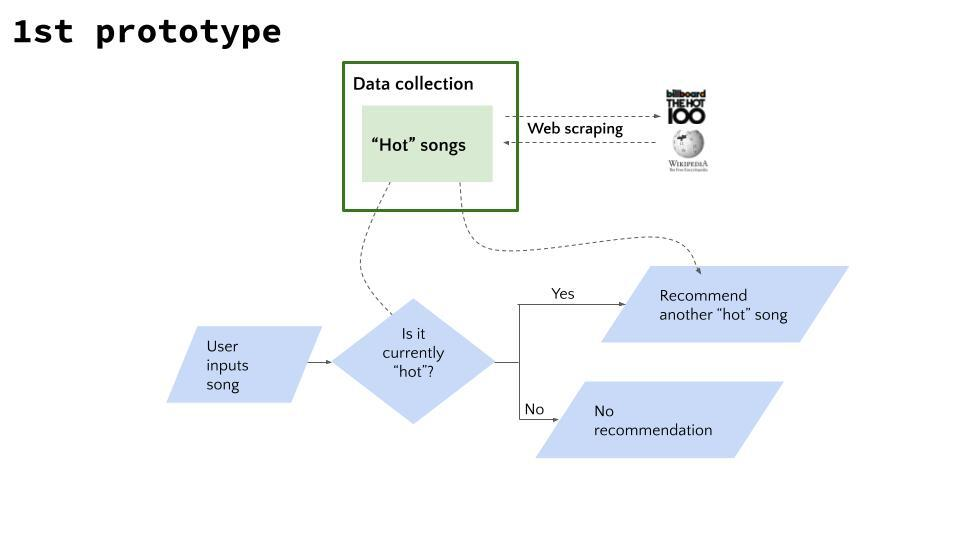

In [172]:
#scheme to follow
from IPython.display import Image 
img = Image(filename='images/gnod_1st_iteration.jpg')
display(img)

**Function to recommend a song between the 100 'hot' songs**

In [12]:
#function to recommend a song btw 100 hot songs
def recommend_100(song, df):
    ''' Parameters: song and dataframe with all songs
        Results: if the song is btw the 100 hot songs, another song from the list is returned.
        df should have a column called 'title'
    '''
    if song.lower() in df.values:
        return(df['title'][random.randint(1,len(df)-1)].title()+" by "+df['artists'][random.randint(1,len(df)-1)].title())
    else:
        return("***") #this will be improve in the 2nd prototype

**Function to validate user input**

In [155]:
#function to validate user input
import re

def validate_input(text):
    ''' Parameters: text entered by user in input
        Results: returns true if it's a possible song, false otherwise
    '''
    #the user entered nothing
    if len(text) == 0:
        return False
    #some songs start or contain numbers, ex: 4 Da Gang
    if text.isalnum():
        return True
    if re.match('(\w+\s\w)', text):
        return True
    return False

## Song recommender: Enter your favorite song!

In [156]:
while True:
    #ask the user for a song
    user_song = input(">> Enter a song you like: ")
    if user_song =='!':
        print("Thank you for using our music recommendation system! Bye :)")
        break
    if validate_input(user_song):
        #apply the recommendation function
        result = recommend_100(user_song,data_100)
        if result =="***":
            print("Not in the list :( Try another song!")
        else:
            print("Recommended for you: ", result)
    else:
        print("That's not a song, try again!")


>> Enter a song you like:  
That's not a song, try again!
>> Enter a song you like: adam
Not in the list :( Try another song!
>> Enter a song you like: peaches
Recommended for you:  Down To One by Ariana Grande
>> Enter a song you like: down to one
Recommended for you:  Telepatia by Young Thug & Gunna
>> Enter a song you like: telepatia
Recommended for you:  Rapstar by Masked Wolf
>> Enter a song you like: !
Thank you for using our music recommendation system! Bye :)


--- 

# Spotify API: extend our songs dataset

In [15]:
# import necessary spotipy tools
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass

In [16]:
client_id = getpass.getpass('client_id:')
client_secret = getpass.getpass('client_secret:')

client_id:········
client_secret:········


In [17]:
# connect to the API
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret), requests_timeout=10, retries=10)

### Process to follow:

**Categories** -> get all the **playlists** (IDs) in that category -> get all the **songs** (IDs) from all playlists (together with their audio feature) -> get all the **audio features** with these IDs

In [18]:
#get categories
sp.categories()

{'categories': {'href': 'https://api.spotify.com/v1/browse/categories?offset=0&limit=20',
  'items': [{'href': 'https://api.spotify.com/v1/browse/categories/toplists',
    'icons': [{'height': 275,
      'url': 'https://t.scdn.co/media/derived/toplists_11160599e6a04ac5d6f2757f5511778f_0_0_275_275.jpg',
      'width': 275}],
    'id': 'toplists',
    'name': 'Top Lists'},
   {'href': 'https://api.spotify.com/v1/browse/categories/at_home',
    'icons': [{'height': None,
      'url': 'https://t.scdn.co/images/04da469dd7be4dab96659aa1fa9f0ac9.jpeg',
      'width': None}],
    'id': 'at_home',
    'name': 'At Home'},
   {'href': 'https://api.spotify.com/v1/browse/categories/pop',
    'icons': [{'height': 274,
      'url': 'https://t.scdn.co/media/derived/pop-274x274_447148649685019f5e2a03a39e78ba52_0_0_274_274.jpg',
      'width': 274}],
    'id': 'pop',
    'name': 'Pop'},
   {'href': 'https://api.spotify.com/v1/browse/categories/equal',
    'icons': [{'height': None,
      'url': 'https:/

In [19]:
# get all the id's for all the categories
[item['id'] for item in sp.categories()['categories']['items']]

#categories are different everytime we query!

['toplists',
 'at_home',
 'pop',
 'equal',
 'mood',
 'decades',
 'hiphop',
 'in_the_car',
 'gaming',
 'wellness',
 'workout',
 'chill',
 'focus',
 'sleep',
 'party',
 'indie_alt',
 'metal',
 'rock',
 'edm_dance',
 'dinner']

#### First category: toplists

In [21]:
top_playlists = sp.category_playlists(category_id ='toplists')

In [22]:
top_playlists.keys()

dict_keys(['playlists'])

In [23]:
top_playlists['playlists']['items']

[{'collaborative': False,
  'description': 'Dua Lipa & DaBaby are on top of the Hottest 50!',
  'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M'},
  'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M',
  'id': '37i9dQZF1DXcBWIGoYBM5M',
  'images': [{'height': None,
    'url': 'https://i.scdn.co/image/ab67706f00000003816bfa84fc1984d377ba5652',
    'width': None}],
  'name': "Today's Top Hits",
  'owner': {'display_name': 'Spotify',
   'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
   'href': 'https://api.spotify.com/v1/users/spotify',
   'id': 'spotify',
   'type': 'user',
   'uri': 'spotify:user:spotify'},
  'primary_color': None,
  'public': None,
  'snapshot_id': 'MTYyMDM2MDAwMCwwMDAwMDRhMzAwMDAwMTc5NDRmYjcyYjAwMDAwMDE3OTQzYzAwNzBi',
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M/tracks',
   'total': 50},
  'type': 'playlist',
  'uri': 'spotify:playlist:37i9dQZF1DXcBWIG

In [24]:
len(top_playlists['playlists']['items'])

13

In [25]:
#first playlist in the category toplists
top_playlists['playlists']['items'][0]

{'collaborative': False,
 'description': 'Dua Lipa & DaBaby are on top of the Hottest 50!',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M'},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M',
 'id': '37i9dQZF1DXcBWIGoYBM5M',
 'images': [{'height': None,
   'url': 'https://i.scdn.co/image/ab67706f00000003816bfa84fc1984d377ba5652',
   'width': None}],
 'name': "Today's Top Hits",
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': None,
 'public': None,
 'snapshot_id': 'MTYyMDM2MDAwMCwwMDAwMDRhMzAwMDAwMTc5NDRmYjcyYjAwMDAwMDE3OTQzYzAwNzBi',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M/tracks',
  'total': 50},
 'type': 'playlist',
 'uri': 'spotify:playlist:37i9dQZF1DXcBWIGoYBM5M'}

In [26]:
#first id of the playlists
top_playlists['playlists']['items'][0]['id']

'37i9dQZF1DXcBWIGoYBM5M'

In [27]:
#let's iterate to get the ids of all the playlists in the category
toplists_ids = []
for playlist in top_playlists['playlists']['items']:
    toplists_ids.append(playlist['id'])
toplists_ids

['37i9dQZF1DXcBWIGoYBM5M',
 '37i9dQZF1DX0XUsuxWHRQd',
 '37i9dQZF1DX4dyzvuaRJ0n',
 '37i9dQZF1DXcF6B6QPhFDv',
 '37i9dQZF1DX4SBhb3fqCJd',
 '37i9dQZF1DX10zKzsJ2jva',
 '37i9dQZF1DX1lVhptIYRda',
 '37i9dQZF1DWZMWLrh2UzwC',
 '37i9dQZF1DWWjGdmeTyeJ6',
 '37i9dQZEVXbMDoHDwVN2tF',
 '37i9dQZEVXbLRQDuF5jeBp',
 '37i9dQZEVXbLiRSasKsNU9',
 '37i9dQZEVXbKuaTI1Z1Afx']

In [33]:
#for all the songs in the first playlist
songs_playtop0 = []
for item in sp.playlist(toplists_ids[0])['tracks']['items']:
    songs_playtop0.append(item['track']['id'])

Get all the songs ids of all the playlists from the category 'toplists'

In [35]:
#now get all the songs ids of all the playlists from toplists_ids (ids of all playlists from category toplists)
songs_playtop = []
for playlist in range(len(toplists_ids)):
    #iterate for every playlist
    playlist = sp.playlist(toplists_ids[playlist])
    songs = playlist['tracks']['items']
    #now for every song inside
    for song in range(len(songs)):
        print(songs[song]['track']['id'])
        songs_playtop.append(songs[song]['track']['id'])

463CkQjx2Zk1yXoBuierM9
748mdHapucXQri7IAO8yFK
37BZB0z9T8Xu7U3e65qxFy
4iJyoBOLtHqaGxP12qzhQI
5qNh5WtzMbfpSj2jLlBkoD
3BZEcbdtXQSo7OrvKRJ6mb
43PGPuHIlVOc04jrZVh9L6
7MAibcTli4IisCtbHKrGMh
5uEYRdEIh9Bo4fpjDd4Na9
3Ofmpyhv5UAQ70mENzB277
1EHUQesfVKwbthtNcpBi9g
27tDoZsybt3KvJWTDoW9id
6fRxMU4LWwyaSSowV441IU
61KpQadow081I2AsbeLcsb
4u4NyuceXP7Uzh7XFJKCr1
0939D7aT18uBDS2MTjWzct
3USxtqRwSYz57Ewm6wWRMp
2etHQJxIbV0soyPhelVs9Y
20GrahbI4AzAOWxpYfDKkf
1XXimziG1uhM0eDNCZCrUl
4cG7HUWYHBV6R6tHn1gxrl
1diS6nkxMQc3wwC4G1j0bh
3Yyj76BeYt3QIffwKpRuKL
7Bk0uXKk1uPT0XuQbpFzvs
6f3Slt0GbA2bPZlz0aIFXN
6tDDoYIxWvMLTdKpjFkc1B
60ynsPSSKe6O3sfwRnIBRf
5YaskwnGDZFDRipaqzbwQx
7jXQUrVhEpXdymfFWNDnQW
6uvMKqNlrSvcC4NaKnrwjZ
1KixkQVDUHggZMU9dUobgm
1v1oIWf2Xgh54kIWuKsDf6
2sX7lJXsOYGP1Us6CqM9t1
2cc8Sw1OnCuA5bV8nqWqpE
2rCbl9naJYhaxjLsfx88uM
5SFXOMJJ334Wn2PwBHeRZN
15OCqNPYoLziEAsbVnqRj5
0b18g3G5spr4ZCkz7Y6Q0Q
6ft4hAq6yde8jPZY2i5zLr
6Tio0ZoDeSQnI7EBAqWer2
3krZxyBsWEHfEfJegYaWTd
6Im9k8u9iIzKMrmV7BWtlF
2pPO9YecZimmuVQfIzfV6U
2MnLkFqY9Rp

TypeError: 'NoneType' object is not subscriptable

In [36]:
len(songs_playtop)

433

In [41]:
# audio features for all these songs
audiofeat_toplist = []
for i in range(len(songs_playtop)):
    audiofeat_toplist.append(sp.audio_features(tracks=songs_playtop[i]))

In [42]:
#convert toplist audio features to dataframe
chunk_list = [song for playlist in audiofeat_toplist for song in playlist if song is not None]

In [43]:
audio_df1 = pd.DataFrame(chunk_list)
audio_df1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4
1,0.762,0.701,8,-3.541,1,0.0286,0.23500,0.000158,0.1230,0.742,110.968,audio_features,748mdHapucXQri7IAO8yFK,spotify:track:748mdHapucXQri7IAO8yFK,https://api.spotify.com/v1/tracks/748mdHapucXQ...,https://api.spotify.com/v1/audio-analysis/748m...,208867,4
2,0.650,0.825,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.593,118.091,audio_features,37BZB0z9T8Xu7U3e65qxFy,spotify:track:37BZB0z9T8Xu7U3e65qxFy,https://api.spotify.com/v1/tracks/37BZB0z9T8Xu...,https://api.spotify.com/v1/audio-analysis/37BZ...,191014,4
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4
4,0.634,0.285,9,-14.007,0,0.0807,0.93700,0.000359,0.2320,0.203,129.650,audio_features,5qNh5WtzMbfpSj2jLlBkoD,spotify:track:5qNh5WtzMbfpSj2jLlBkoD,https://api.spotify.com/v1/tracks/5qNh5WtzMbfp...,https://api.spotify.com/v1/audio-analysis/5qNh...,245897,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.792,0.602,4,-4.612,0,0.0553,0.29900,0.000060,0.1470,0.751,114.114,audio_features,2DBB5OAB7iYxnDKvjTyp4Z,spotify:track:2DBB5OAB7iYxnDKvjTyp4Z,https://api.spotify.com/v1/tracks/2DBB5OAB7iYx...,https://api.spotify.com/v1/audio-analysis/2DBB...,147148,4
429,0.787,0.852,5,-6.442,0,0.1460,0.01750,0.000724,0.1670,0.887,117.988,audio_features,1INnYwu9Zn4odIzxyEAGqf,spotify:track:1INnYwu9Zn4odIzxyEAGqf,https://api.spotify.com/v1/tracks/1INnYwu9Zn4o...,https://api.spotify.com/v1/audio-analysis/1INn...,196039,4
430,0.849,0.669,7,-4.872,1,0.0966,0.04330,0.000004,0.0727,0.607,117.024,audio_features,46W9QGI2bVjitikXmpHFgv,spotify:track:46W9QGI2bVjitikXmpHFgv,https://api.spotify.com/v1/tracks/46W9QGI2bVji...,https://api.spotify.com/v1/audio-analysis/46W9...,162051,4
431,0.439,0.441,7,-8.044,1,0.0356,0.26900,0.000000,0.1580,0.179,82.096,audio_features,2SY4ep4NQaArath0ze4gTg,spotify:track:2SY4ep4NQaArath0ze4gTg,https://api.spotify.com/v1/tracks/2SY4ep4NQaAr...,https://api.spotify.com/v1/audio-analysis/2SY4...,239180,4


In [44]:
#drop duplicates because can be same songs in different playlists
audio_df1 = audio_df1.drop_duplicates()
audio_df1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4
1,0.762,0.701,8,-3.541,1,0.0286,0.23500,0.000158,0.1230,0.742,110.968,audio_features,748mdHapucXQri7IAO8yFK,spotify:track:748mdHapucXQri7IAO8yFK,https://api.spotify.com/v1/tracks/748mdHapucXQ...,https://api.spotify.com/v1/audio-analysis/748m...,208867,4
2,0.650,0.825,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.593,118.091,audio_features,37BZB0z9T8Xu7U3e65qxFy,spotify:track:37BZB0z9T8Xu7U3e65qxFy,https://api.spotify.com/v1/tracks/37BZB0z9T8Xu...,https://api.spotify.com/v1/audio-analysis/37BZ...,191014,4
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4
4,0.634,0.285,9,-14.007,0,0.0807,0.93700,0.000359,0.2320,0.203,129.650,audio_features,5qNh5WtzMbfpSj2jLlBkoD,spotify:track:5qNh5WtzMbfpSj2jLlBkoD,https://api.spotify.com/v1/tracks/5qNh5WtzMbfp...,https://api.spotify.com/v1/audio-analysis/5qNh...,245897,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.792,0.602,4,-4.612,0,0.0553,0.29900,0.000060,0.1470,0.751,114.114,audio_features,2DBB5OAB7iYxnDKvjTyp4Z,spotify:track:2DBB5OAB7iYxnDKvjTyp4Z,https://api.spotify.com/v1/tracks/2DBB5OAB7iYx...,https://api.spotify.com/v1/audio-analysis/2DBB...,147148,4
429,0.787,0.852,5,-6.442,0,0.1460,0.01750,0.000724,0.1670,0.887,117.988,audio_features,1INnYwu9Zn4odIzxyEAGqf,spotify:track:1INnYwu9Zn4odIzxyEAGqf,https://api.spotify.com/v1/tracks/1INnYwu9Zn4o...,https://api.spotify.com/v1/audio-analysis/1INn...,196039,4
430,0.849,0.669,7,-4.872,1,0.0966,0.04330,0.000004,0.0727,0.607,117.024,audio_features,46W9QGI2bVjitikXmpHFgv,spotify:track:46W9QGI2bVjitikXmpHFgv,https://api.spotify.com/v1/tracks/46W9QGI2bVji...,https://api.spotify.com/v1/audio-analysis/46W9...,162051,4
431,0.439,0.441,7,-8.044,1,0.0356,0.26900,0.000000,0.1580,0.179,82.096,audio_features,2SY4ep4NQaArath0ze4gTg,spotify:track:2SY4ep4NQaArath0ze4gTg,https://api.spotify.com/v1/tracks/2SY4ep4NQaAr...,https://api.spotify.com/v1/audio-analysis/2SY4...,239180,4


#### Second category : decades

In [47]:
decade_playlists = sp.category_playlists(category_id ='decades')

In [48]:
#let's iterate to get the ids of all the playlists in the category 'decades'
decadelists_ids = []
for playlist in decade_playlists['playlists']['items']:
    decadelists_ids.append(playlist['id'])
decadelists_ids

['37i9dQZF1DX4UtSsGT1Sbe',
 '37i9dQZF1DX4o1oenSJRJd',
 '37i9dQZF1DX5Ejj0EkURtP',
 '37i9dQZF1DWTJ7xPn4vNaz',
 '37i9dQZF1DXbTxeAdrVG2l',
 '37i9dQZF1DX3oM43CtKnRV',
 '37i9dQZF1DX1rVvRgjX59F',
 '37i9dQZF1DXc3KygMa1OE7',
 '37i9dQZF1DXaKIA8E7WcJj',
 '37i9dQZF1DWUH2AzNQzWua',
 '37i9dQZF1DWSV3Tk4GO2fq',
 '37i9dQZF1DX873GaRGUmPl',
 '37i9dQZF1DXb9LIXaj5WhL',
 '37i9dQZF1DX8a1tdzq5tbM',
 '37i9dQZF1DXdTCdwCKzXwo',
 '37i9dQZF1DX6RCydf9ytsj',
 '37i9dQZF1DXaLI8a395lse',
 '37i9dQZF1DX0YKekzl0blG',
 '37i9dQZF1DX99DRG9N39X3',
 '37i9dQZF1DX3Gj7nguS95W']

In [49]:
#now get all the songs ids of all the playlists from decades
songs_playdecade = []
for playlist in range(len(decadelists_ids)):
    #iterate for every playlist
    playlist = sp.playlist(decadelists_ids[playlist])
    songs = playlist['tracks']['items']
    #now for every song inside
    for song in range(len(songs)):
        print(songs[song]['track']['id'])
        songs_playdecade.append(songs[song]['track']['id'])

2fuCquhmrzHpu5xcA1ci9x
0lzpfrTARexLFXEACKSXTh
7gozgbG5EBTukCFWToTRA5
4kOfxxnW1ukZdsNbCKY9br
2WfaOiMkCvy7F5fcp2zZ8L
0SNGe4xksgp7CGnY5kMXOJ
63CHa6rmamv9OsehkRD8oz
5ChkMS8OtdzJeqyybCc9R5
2tUBqZG2AbRi7Q0BIrVrEj
0GONea6G2XdnHWjNZd6zt3
5vdp5UmvTsnMEMESIF2Ym7
1JLn8RhQzHz3qDqsChcmBl
0n1NI4TnEw0SeXSS4DNhhb
3BZGi1yUqQyCNC868AqUGG
3cbV252akVZInSvJk7jAYX
1UBQ5GK8JaQjm5VbkBZY66
1BY1Vd2Bt6JPOhMvsIwtVv
0CsM8VGDi38kusMv3pxyj1
6Nd6ntkzr4t8o1FKPGOSMt
4yD5hKvrw3L6sRJbzgaFwe
17CPezzLWzvGfpZW6X8XT0
00FDHurakzVEiPutdUxXXq
77NNZQSqzLNqh2A9JhLRkg
2OZyDYkNED6mIDi8RXLnWy
4ibq2TNN6eKpPi9KB3NvTV
1aZLIbKEdsyqxyD6iNcrbA
0odIT9B9BvOCnXfS0e4lB5
6QLspHLCLftSGPa6vNzKuo
1c9dnQbOzw01ID7X2IsYOE
4JEylZNW8SbO4zUyfVrpb7
58qBa4R0T7u0ZiuRvMJRUN
7j74lucZ59vqN67Ipe2ZcY
4qM461TqtpnP4GLRIXwEnW
51H2y6YrNNXcy3dfc3qSbA
6sn3FHCq2csvNkq2h9Au8V
1xPSDf8z4dH46gkvlLtvDO
0kzSooCGpuphLwn8iTuO9h
5HQ639Z3ms3hnZx0KfWnkp
75FEaRjZTKLhTrFGsfMUXR
0r5Ju8WyodpXBHmg3f4zYf
3wfujdbamR3Z46F4xav7LM
2avaSeKHI5l4sLruVfLdi2
7FwBtcecmlpc1sLySPXeGE
0F1O42pitei

1Je1IMUlBXcx1Fz0WE7oPT
3APayTEWiUl9Ssep4BOXR2
7f0jXNMu2xjQUtmKMuWhGA
1Eb90nmqTrxylKFhcUzW8P
2CT3r93YuSHtm57mjxvjhH
6e40mgJiCid5HRAGrbpGA6
7L93Qjqgh05ZuFflWWyTjN
5sICkBXVmaCQk5aISGR3x1
4QlzkaRHtU8gAdwqjWmO8n
1Oi2zpmL81Q0yScF1zxaC0
7lQWRAjyhTpCWFC0jmclT4
64BbK9SFKH2jk86U3dGj2P
1yy2DlSDtEt90d54rPDPXz
1oTHteQbmJw15rPxPVXUTv
5xC8uOesnn0udeXAYlAnoY
3wuCCNCnBhJlwkIJTBZFiv
7tHYA0eEH6dAAzMurBNvT9
7fI96JHMnvd3Ft70Zzv74G
4eHbdreAnSOrDDsFfc4Fpm
503OTo2dSqe7qk76rgsbep
0uqvSVhGgQTIdj9G51vhvv
53qhh1kdcX4gRBShoW4LK8
11LmqTE2naFULdEP94AUBa
7MCNnnmwm7TXMh7xyNGohi
4CcSw8wQAHYf4XNckayPoc
2WElktskrNJEwgpp5Vouxk
3Mmt6Xk0H6VR92PEp6x3hP
1eOCyaSRBdFGofbLYjgGM2
2C1LBnSUybZIGRJUkSK2GC
1d6KS9GH06JAd19uiBy9IE
11mwFrKvLXCbcVGNxffGyP
6kvoHl80mfCVTv7XnZkjQn
225xvV8r1yKMHErSWivnow
7sJN693sYKEIEMu7fc5VnJ
3xZMPZQYETEn4hjor3TR1A
7ySbfLwdCwl1EM0zNCJZ38
6PwbVXIomkvk4YcafiOc6i
5QLHGv0DfpeXLNFo7SFEy1
1Q0p30HuN1ADMX2CmPzIvO
2aC8wwfrM0YeTAzzk8hxqC
7pUARNBq1Puwna5LrAhosi
6XOINCZBv8Q7RXgNNiTwIN
7zB3ZhA5v33pA4rCdKKGqq
3Q8PSzpMJkn

01u6AEzGbGbQyYVdxajxqk
3aEJMh1cXKEjgh52claxQp
307XEC1IUwUs9ojlEFwH7f
5yQ9iMZXGcr5rlO4hoLsP4
3vFVS2WYHDG4KkWCNecvpn
50RwvvEKX5Q7AZt8FTAwIF
1ZWIQXfAquWtLDK5aOUczS
0x0ffSAP6PkdoDgHOfroof
6XAcmxPbCfMzLBvjBd2G0H
7hxZF4jETnE5Q75rKQnMjE
7s7Zu78CztOUFUyQ4BijBQ
0F76EzCOmno4KJviO7iGNq
64Ny7djQ6rNJspquof2KoX
4ydtQJImyQg6UDFFZBzgxp
07GtDOCxmye5KDWsTSACPk
10DTjZTPH0y0XXFYp43AXC
1j7HyD3cxyYw9bMFevxWyR
5wbZ3sbWf4PppzZiRxkxou
77FRvC6JRthZBYDiMJeAFg
2R7uUQ0Dehu80gsOcydQC9
1gU6T4sESXRt6RC2ufSqDf
00e59ZgjHI2GwsiY3oXayw
1s4hyUFWmLWiAamsclb4xA
5y3gqKswDeU8pJ878YFPUy
72nqbbrKjhXmDdRXQGq115
49vvBOlcnR3X4ArmnZMPL3
6pVZR38m2UcizxA6YAnkw4
2xar08Fq5xra2KKZs5Bw9j
3koJ1vDWEITIrfMlNaHIu3
1KLpjQFgubHI3GkAICCNH3
4bzvhZFlV9UqQ3EmV2i8s4
14bUqUj1EUnQabWeAqnj39
675n4cfx308vwH0VBGqEOM
5tHFPtV7dT01fxDe2AhKjD
2OARIMw1hpehr86Iwmv04c
494NO14SgIot2L5fdCmGh4
7fWo4TRloCEOl12sMX2sNq
3ZR0us36Z8kgBXFMYkhugR
7EM1CeaWPjCdVY1vO0KiO4
4gFlHAye7To29Fs4UszQUH
21NhrNOfIoakyWISXUMkFN
66D7zHfeW0frszhjR9ewZ1
3P6OwCX7Ofiaaqtvujb6i5
1UzlJGnPQLC

1zQBO3qNSeJVuHZTwZ7Wx6
1KeWCjmGE74qeB3OSbB5Ax
3GdqfRTNtoAbYsDvipCoVg
4H2TRR9FjnnIwxGnIt9stO
6ORuFMNsVti1by7vkgDdVK
6BkK5Dsu1kTne7Cn6EyYex
0zd4IzrpBnA1giNE6KkYby
3mM14WXoPaLRjjkmxHe99L
6qdaMyeAxixEtIiI1Wqr4l
7FsM2MPjPCdgYld4NsvO0f
2elArKzloacigjiGat97QZ
5LrOeu7a2hWpjkx7B8quGZ
5jVGZTrDusSvwhRDPmZMSB
36V6Cb9DjnxlVNqqgD5piw
1zDdz9Ob7uSia00uUfm8O3
13p0TeLG8v8x11RUIInwAL
2mEAWmVDub6PSF8pZXInrS
3onPZQxZ9igu7plus3rK7D
1MQYA59Whe8zRBnGqgAvMP
27QrAETf4eB2J533ktttTw
6dko4bgiL9XsKjUiqYN5V4
17zj9e1nYLJaKjqKuwWCht
5j2yIrnbgDW51GM95ZjqDj
0t2EyDBuMiQ3iHi3rXrFtR
63fI8hzSrsXNGl0CMju2DW
6NaQDBNUP6LcsZklHizAki
3cPgnLawNeUl9YsZIBdsrs
5i3m1HZBzurdMu9zzjBY7r
4PsXJjKjUQzuX5o9UAsNF2
0BM8wPzuihqUE561Poj2b7
269tQZZrPkJrWTpgK915BW
4VF5XIZ7EiMfLElRzYG2E8
1U4u5ludTymnG9tMuHS02b
4txNtoBnQ3OgazfeTS8iGP
51EKPuV1uAWryjNMqZLtgJ
2QaKxNtOx8bT7Q8ogqB7P6
35t1qEtVm1LBfOOzWrtDRf
2VPnnOGXmejtKqxGY4jg66
5K8MiZ3xJD57Z77EOCZGaI
1ADDagtKH24eNO8eJ6II6j
7xRind9RPsvGHWR0qbGmfE
1IyktkUQ3ktjlc6eDXG967
6uvT4Di9ZRBw5cbexZJDts
4yXvztnOOlS

In [50]:
len(songs_playdecade)

1695

In [51]:
# audio features for all these songs
audiofeat_decadelist = []
for i in range(len(songs_playdecade)):
    audiofeat_decadelist.append(sp.audio_features(tracks=songs_playdecade[i]))

In [52]:
#convert list audio features to dataframe
chunk_list = [song for playlist in audiofeat_decadelist for song in playlist if song is not None]

In [53]:
audio_df2 = pd.DataFrame(chunk_list)
audio_df2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.671,0.712,2,-7.815,1,0.0476,0.429000,0.000000,0.1030,0.462,113.805,audio_features,2fuCquhmrzHpu5xcA1ci9x,spotify:track:2fuCquhmrzHpu5xcA1ci9x,https://api.spotify.com/v1/tracks/2fuCquhmrzHp...,https://api.spotify.com/v1/audio-analysis/2fuC...,248440,4
1,0.489,0.927,10,-6.298,0,0.1700,0.455000,0.001650,0.3050,0.790,177.354,audio_features,0lzpfrTARexLFXEACKSXTh,spotify:track:0lzpfrTARexLFXEACKSXTh,https://api.spotify.com/v1/tracks/0lzpfrTARexL...,https://api.spotify.com/v1/audio-analysis/0lzp...,181787,4
2,0.565,0.764,1,-9.430,1,0.0351,0.013900,0.004880,0.0790,0.686,100.891,audio_features,7gozgbG5EBTukCFWToTRA5,spotify:track:7gozgbG5EBTukCFWToTRA5,https://api.spotify.com/v1/tracks/7gozgbG5EBTu...,https://api.spotify.com/v1/audio-analysis/7goz...,277480,4
3,0.851,0.406,1,-11.631,1,0.0661,0.219000,0.000006,0.0853,0.792,97.840,audio_features,4kOfxxnW1ukZdsNbCKY9br,spotify:track:4kOfxxnW1ukZdsNbCKY9br,https://api.spotify.com/v1/tracks/4kOfxxnW1ukZ...,https://api.spotify.com/v1/audio-analysis/4kOf...,226880,4
4,0.573,0.902,6,-7.638,0,0.0540,0.018000,0.001250,0.0928,0.876,84.412,audio_features,2WfaOiMkCvy7F5fcp2zZ8L,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,https://api.spotify.com/v1/tracks/2WfaOiMkCvy7...,https://api.spotify.com/v1/audio-analysis/2Wfa...,225280,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,0.286,0.866,4,-6.552,1,0.0723,0.000048,0.000029,0.6970,0.604,155.366,audio_features,4IP1tVzPYvMWM5LLtGwF4H,spotify:track:4IP1tVzPYvMWM5LLtGwF4H,https://api.spotify.com/v1/tracks/4IP1tVzPYvMW...,https://api.spotify.com/v1/audio-analysis/4IP1...,178733,4
1691,0.561,0.974,6,-5.178,1,0.1130,0.057200,0.000000,0.2440,0.337,120.297,audio_features,2xq9cLlOPyLoi8kLlR4miz,spotify:track:2xq9cLlOPyLoi8kLlR4miz,https://api.spotify.com/v1/tracks/2xq9cLlOPyLo...,https://api.spotify.com/v1/audio-analysis/2xq9...,231573,4
1692,0.791,0.768,9,-9.348,1,0.0957,0.137000,0.000004,0.3070,0.722,124.077,audio_features,4gTMIyJJlSuB5BOhbMri6B,spotify:track:4gTMIyJJlSuB5BOhbMri6B,https://api.spotify.com/v1/tracks/4gTMIyJJlSuB...,https://api.spotify.com/v1/audio-analysis/4gTM...,257133,4
1693,0.711,0.788,11,-14.705,1,0.0825,0.011700,0.000002,0.3110,0.757,103.172,audio_features,3BGbqEDio3ocx1v4egIYr6,spotify:track:3BGbqEDio3ocx1v4egIYr6,https://api.spotify.com/v1/tracks/3BGbqEDio3oc...,https://api.spotify.com/v1/audio-analysis/3BGb...,204560,4


In [54]:
audio_df2 = audio_df2.drop_duplicates()
audio_df2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.671,0.712,2,-7.815,1,0.0476,0.429000,0.000000,0.1030,0.462,113.805,audio_features,2fuCquhmrzHpu5xcA1ci9x,spotify:track:2fuCquhmrzHpu5xcA1ci9x,https://api.spotify.com/v1/tracks/2fuCquhmrzHp...,https://api.spotify.com/v1/audio-analysis/2fuC...,248440,4
1,0.489,0.927,10,-6.298,0,0.1700,0.455000,0.001650,0.3050,0.790,177.354,audio_features,0lzpfrTARexLFXEACKSXTh,spotify:track:0lzpfrTARexLFXEACKSXTh,https://api.spotify.com/v1/tracks/0lzpfrTARexL...,https://api.spotify.com/v1/audio-analysis/0lzp...,181787,4
2,0.565,0.764,1,-9.430,1,0.0351,0.013900,0.004880,0.0790,0.686,100.891,audio_features,7gozgbG5EBTukCFWToTRA5,spotify:track:7gozgbG5EBTukCFWToTRA5,https://api.spotify.com/v1/tracks/7gozgbG5EBTu...,https://api.spotify.com/v1/audio-analysis/7goz...,277480,4
3,0.851,0.406,1,-11.631,1,0.0661,0.219000,0.000006,0.0853,0.792,97.840,audio_features,4kOfxxnW1ukZdsNbCKY9br,spotify:track:4kOfxxnW1ukZdsNbCKY9br,https://api.spotify.com/v1/tracks/4kOfxxnW1ukZ...,https://api.spotify.com/v1/audio-analysis/4kOf...,226880,4
4,0.573,0.902,6,-7.638,0,0.0540,0.018000,0.001250,0.0928,0.876,84.412,audio_features,2WfaOiMkCvy7F5fcp2zZ8L,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,https://api.spotify.com/v1/tracks/2WfaOiMkCvy7...,https://api.spotify.com/v1/audio-analysis/2Wfa...,225280,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,0.286,0.866,4,-6.552,1,0.0723,0.000048,0.000029,0.6970,0.604,155.366,audio_features,4IP1tVzPYvMWM5LLtGwF4H,spotify:track:4IP1tVzPYvMWM5LLtGwF4H,https://api.spotify.com/v1/tracks/4IP1tVzPYvMW...,https://api.spotify.com/v1/audio-analysis/4IP1...,178733,4
1691,0.561,0.974,6,-5.178,1,0.1130,0.057200,0.000000,0.2440,0.337,120.297,audio_features,2xq9cLlOPyLoi8kLlR4miz,spotify:track:2xq9cLlOPyLoi8kLlR4miz,https://api.spotify.com/v1/tracks/2xq9cLlOPyLo...,https://api.spotify.com/v1/audio-analysis/2xq9...,231573,4
1692,0.791,0.768,9,-9.348,1,0.0957,0.137000,0.000004,0.3070,0.722,124.077,audio_features,4gTMIyJJlSuB5BOhbMri6B,spotify:track:4gTMIyJJlSuB5BOhbMri6B,https://api.spotify.com/v1/tracks/4gTMIyJJlSuB...,https://api.spotify.com/v1/audio-analysis/4gTM...,257133,4
1693,0.711,0.788,11,-14.705,1,0.0825,0.011700,0.000002,0.3110,0.757,103.172,audio_features,3BGbqEDio3ocx1v4egIYr6,spotify:track:3BGbqEDio3ocx1v4egIYr6,https://api.spotify.com/v1/tracks/3BGbqEDio3oc...,https://api.spotify.com/v1/audio-analysis/3BGb...,204560,4


#### 3rd category: rock

In [57]:
rock_playlists = sp.category_playlists(category_id ='rock')

In [58]:
#let's iterate to get the ids of all the playlists in the category 'rock'
rocklists_ids = []
for playlist in rock_playlists['playlists']['items']:
    rocklists_ids.append(playlist['id'])
rocklists_ids

['37i9dQZF1DWXRqgorJj26U',
 '37i9dQZF1DWYE5MI4mMuii',
 '37i9dQZF1DXaKs4phBF9kX',
 '37i9dQZF1DX1kznM9KyewU',
 '37i9dQZF1DX3oM43CtKnRV',
 '37i9dQZF1DX1rVvRgjX59F',
 '37i9dQZF1DXcF6B6QPhFDv',
 '37i9dQZF1DXasneILDRM7B',
 '37i9dQZF1DX11ghcIxjcjE',
 '37i9dQZF1DX49jUV2NfGku',
 '37i9dQZF1DX0rCrO4CFRfM',
 '37i9dQZF1DX2UXfvEIZvDK',
 '37i9dQZF1DX99DRG9N39X3',
 '37i9dQZF1DWVwr24yj95lH',
 '37i9dQZF1DWZryfp6NSvtz',
 '37i9dQZF1DX0fWtUuB7bFE',
 '37i9dQZF1DXcKHVXMYcCuJ',
 '37i9dQZF1DWYAyGN1XM1YS']

In [59]:
len(rocklists_ids)

18

In [60]:
#now get all the songs ids of all the playlists from rock
songs_playrock = []
for playlist in range(len(rocklists_ids)):
    #iterate for every playlist
    playlist = sp.playlist(rocklists_ids[playlist])
    songs = playlist['tracks']['items']
    #now for every song inside
    for song in range(len(songs)):
        print(songs[song]['track']['id'])
        songs_playrock.append(songs[song]['track']['id'])

7MRyJPksH3G2cXHN8UKYzP
0hCB0YR03f6AmQaHbwWDe8
2aoo2jlRnM3A0NyLQqMN2f
2EqlS6tkEnglzr7tkKAAYD
08mG3Y1vljYA6bvDt4Wqkj
1RJeiAIwR9pZBgJA8ndZLL
66lOpKgTyFjOrac4S1s94g
39shmbIHICJ2Wxnk1fPSdz
2KmEgiY8fQs0G6WNxtzQKr
24NwBd5vZ2CK8VOQVnqdxr
57JVGBtBLCfHw2muk5416J
5uvosCdMlFdTXhoazkTI5R
70YvYr2hGlS01bKRIho1HM
3YBZIN3rekqsKxbJc9FZko
61Q9oJNd9hJQFhSDh6Qlap
3AhXZa8sUQht0UEdBJgpGc
2K2M0TcglCRLLpFOzKeFZA
4CJVkjo5WpmUAKp3R44LNb
4BP3uh0hFLFRb5cjsgLqDh
4gMgiXfqyzZLMhsksGmbQV
2X6gdRlGOQgfaXU9ALUQFQ
1IqFh00G2kvvMm8pRMpehA
40riOy7x9W7GXjyGp4pjAv
371VkfwKiXJxgH5ZPoQNHD
63OFKbMaZSDZ4wtesuuq6f
1qRA5BS78u3gME0loMl9AA
32kgOw8wejH7zUhtXCM8DH
6cr6UDpkjEaMQ80OjWqEBQ
4uGIJG1jYFonGc4LGp5uQL
5p3JunprHCxClJjOmcLV8G
6KTv0Z8BmVqM7DPxbGzpVC
3QZ7uX97s82HFYSmQUAN1D
2aSFLiDPreOVP6KHiWk4lF
51H2y6YrNNXcy3dfc3qSbA
2sXp9Qmvc7mRaDBjBgcGGi
5QTxFnGygVM4jFQiBovmRo
54eZmuggBFJbV7k248bTTt
3gdewACMIVMEWVbyb8O9sY
1JkZg3eMQTmTn93E8Yd3UL
6Vjk8MNXpQpi0F4BefdTyq
5MxNLUsfh7uzROypsoO5qe
2zYzyRzz6pRmhPzyfMEC8s
5LNiqEqpDc8TuqPy79kDBu
2HXixVqzzm9

3tSmXSxaAnU1EPGKa6NytH
003vvx7Niy0yvhvHt4a68B
5wQnmLuC1W7ATsArWACrgW
72li0d2CgwciPLPADO0J0d
7i6r9KotUPQg3ozKKgEPIN
3mcG2NI5G5vhrQtRda1YnA
45zvStEMsXp8z45OQRhWFJ
3CkjLJYnnyOtGk4Jx4iYS4
3YuaBvuZqcwN3CEAyyoaei
3SUusuA9jH1v6PVwtYMbdv
55mJleti2WfWEFNFcBduhc
0a7BloCiNzLDD9qSQHh5m7
4bPQs0PHn4xbipzdPfn6du
5jZ1Z2GFTf2gwmFc3qiUxs
1oTo3ijRbaDAtrjJrGAPSw
2YxXuCdbUpil3P7tRjhW1t
305WCRhhS10XUcH6AEwZk6
5eek2X5459T1HoYJk2CKXv
4nUM7pGcTUK2pY1d2LybrT
5VGlqQANWDKJFl0MBG3sg2
5VVuxxuQIJD0pjjFls1DKL
5lJUXSjRjevVy7I3P87wuK
2lwwrWVKdf3LR9lbbhnr6R
57Xjny5yNzAcsxnusKmAfA
5KDNFlHAdDJ84fhK27c35X
42GP0xKtkolBnmqQRvSllO
2DGFNAg4pTPLFKPeQRbGDZ
0d0fE0YTXTsSZ6bTuuWwdm
4u8CBUCaCONAQ1kQNH7r1O
3AJwUDP919kvQ9QcozQPxg
5AiNZnMDCWwujIENPj9PV9
29EkMZmUNz1WsuzaMtVo1i
3lPr8ghNDBLc2uZovNyLs9
10Nmj3JCNoMeBQ87uw5j8k
61qn7uoDsuswZs5p2DkFiP
0gzqZ9d1jIKo9psEIthwXe
1Vej0qeQ3ioKwpI6FUbRv1
40rvBMQizxkIqnjPdEWY1v
51Vic2Yi71YKNtLbyJKgQt
5pvJ59i7JxylN8VB24xdMs
1lHtE5JDCas1EwXhQIMOIj
70wYA8oYHoMzhRRkARoMhU
1yKu2MhpwzDXXH2tzG6xoa
1EotcFbWTbM

1BMDaiVYDREQnrQZA7Drpk
1hUD0aBTicbHb5G3p5P79e
4FM8TeKWsro8yjzbpDwocN
5bIwmWHtIAtYmSRxx7xhq7
5Tybis9p4M4TX2gJM8iqgh
6ORqU0bHbVCRjXm9AjyHyZ
325aNb4eh8HesYlrJmLSMX
2QcsmywCAqaaBtPibf3QRb
5rwq6R0Uq0BngM3rdmCeNg
4hhc1rMxhTFbTRf9gCFgyR
23SVad8eDBAtoCFgF8vOFl
5MVrZa7cDtnAoMvCgRAMqb
5BNrHQ7jHAq5VfXqnEN3BH
1xP9IsJMMihmBzQgTIhTLg
55G4pHzYpiTk2Hlknn5wXF
6c6vG7r3RWpiuIrawHNpd7
0LeuWbFlcDkgs2qJ2oigCR
056HNTJyIndDt5qmI7VTJ1
1CobuGL6ysSrfCE2tWcfFU
2pDUQD1PCN7nYNay2G22Qy
4xzgVo1zQucUU8CpUNRD9I
0QlJAgg3zveXMQwKWmJdyJ
1EKfyIWznKN5EeK2i6IV3n
4I03suXK2BpP8edU5UXqhr
02WfKxLdKIHi5grvCiY2cs
2fYq0QnkfHuNSlZqc8qgv7
7eb8es1eZwGNCgm6BDU8Xh
2yyj5YLcGKcddBaQBNsulz
6UFhNbE4sLRUoM52kC4Xl4
3FtG5vgTsSnTeUFL0pzvQx
0Akytll1e5KvwNKvhqIZFn
69mwPY097BcpVDYHOFIAT7
4h2wAqBUu9jaTAdrLttSRh
0PHrdruYGBzeOZH43A9QG8
2BEZkzfIWNFSNjZMAKhyAR
4yzgjSHWy5E8fKflgwaKQh
0BIjDnRM8BKv33GVztgyIl
0ZObDSV7QWyu0Zdinf61Mq
7frRC44kmARBbi49cWSI7d
4cnO0iec95UnL8IGSwgaQZ
54dtOFYgkjNcYBdywUl4BQ
0hJnqEmo8DeMmRhh6mwAof
6QuYC4Vcr3myWxZRJxg4NZ
2SeJ9YrUC24

TypeError: 'NoneType' object is not subscriptable

In [61]:
len(songs_playrock)

1079

In [62]:
# audio features for all these songs
audiofeat_rocklist = []
for i in range(len(songs_playrock)):
    audiofeat_rocklist.append(sp.audio_features(tracks=songs_playrock[i]))

In [63]:
len(audiofeat_rocklist)

1079

In [64]:
#convert list audio features to dataframe
chunk_list = [song for playlist in audiofeat_rocklist for song in playlist if song is not None]

In [65]:
audio_df3 = pd.DataFrame(chunk_list)
audio_df3

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.550,0.824,2,-5.988,1,0.0334,0.448000,0.000127,0.3660,0.777,114.512,audio_features,7MRyJPksH3G2cXHN8UKYzP,spotify:track:7MRyJPksH3G2cXHN8UKYzP,https://api.spotify.com/v1/tracks/7MRyJPksH3G2...,https://api.spotify.com/v1/audio-analysis/7MRy...,214733,4
1,0.412,0.902,9,-11.600,1,0.4050,0.048400,0.131000,0.4050,0.422,89.740,audio_features,0hCB0YR03f6AmQaHbwWDe8,spotify:track:0hCB0YR03f6AmQaHbwWDe8,https://api.spotify.com/v1/tracks/0hCB0YR03f6A...,https://api.spotify.com/v1/audio-analysis/0hCB...,333893,4
2,0.438,0.805,8,-6.237,1,0.0624,0.002550,0.000057,0.0842,0.564,113.253,audio_features,2aoo2jlRnM3A0NyLQqMN2f,spotify:track:2aoo2jlRnM3A0NyLQqMN2f,https://api.spotify.com/v1/tracks/2aoo2jlRnM3A...,https://api.spotify.com/v1/audio-analysis/2aoo...,240800,4
3,0.533,0.376,9,-11.913,0,0.0393,0.030200,0.248000,0.0926,0.187,165.007,audio_features,2EqlS6tkEnglzr7tkKAAYD,spotify:track:2EqlS6tkEnglzr7tkKAAYD,https://api.spotify.com/v1/tracks/2EqlS6tkEngl...,https://api.spotify.com/v1/audio-analysis/2Eql...,259947,4
4,0.310,0.700,9,-5.678,1,0.0470,0.011000,0.009650,0.0828,0.763,188.386,audio_features,08mG3Y1vljYA6bvDt4Wqkj,spotify:track:08mG3Y1vljYA6bvDt4Wqkj,https://api.spotify.com/v1/tracks/08mG3Y1vljYA...,https://api.spotify.com/v1/audio-analysis/08mG...,255493,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0.503,0.685,9,-6.480,0,0.0423,0.042100,0.000000,0.0674,0.508,146.997,audio_features,5z3fn2F5AyFbsjrOyzSnAB,spotify:track:5z3fn2F5AyFbsjrOyzSnAB,https://api.spotify.com/v1/tracks/5z3fn2F5AyFb...,https://api.spotify.com/v1/audio-analysis/5z3f...,200067,4
1075,0.457,0.804,6,-4.756,0,0.0362,0.000206,0.000000,0.1970,0.523,155.022,audio_features,0zu5YEA4jVLa36NtZHS6SO,spotify:track:0zu5YEA4jVLa36NtZHS6SO,https://api.spotify.com/v1/tracks/0zu5YEA4jVLa...,https://api.spotify.com/v1/audio-analysis/0zu5...,171033,4
1076,0.324,0.645,5,-7.148,0,0.0403,0.006000,0.097200,0.0696,0.136,125.997,audio_features,637aZ5pe1WFBamSePkmQ9x,spotify:track:637aZ5pe1WFBamSePkmQ9x,https://api.spotify.com/v1/tracks/637aZ5pe1WFB...,https://api.spotify.com/v1/audio-analysis/637a...,382800,4
1077,0.704,0.664,9,-5.625,1,0.0752,0.016100,0.000003,0.0947,0.714,90.011,audio_features,1TAgKYwyFF7uyBum0ESDlU,spotify:track:1TAgKYwyFF7uyBum0ESDlU,https://api.spotify.com/v1/tracks/1TAgKYwyFF7u...,https://api.spotify.com/v1/audio-analysis/1TAg...,198142,4


In [66]:
audio_df3 = audio_df3.drop_duplicates()
audio_df3

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.550,0.824,2,-5.988,1,0.0334,0.44800,0.000127,0.3660,0.777,114.512,audio_features,7MRyJPksH3G2cXHN8UKYzP,spotify:track:7MRyJPksH3G2cXHN8UKYzP,https://api.spotify.com/v1/tracks/7MRyJPksH3G2...,https://api.spotify.com/v1/audio-analysis/7MRy...,214733,4
1,0.412,0.902,9,-11.600,1,0.4050,0.04840,0.131000,0.4050,0.422,89.740,audio_features,0hCB0YR03f6AmQaHbwWDe8,spotify:track:0hCB0YR03f6AmQaHbwWDe8,https://api.spotify.com/v1/tracks/0hCB0YR03f6A...,https://api.spotify.com/v1/audio-analysis/0hCB...,333893,4
2,0.438,0.805,8,-6.237,1,0.0624,0.00255,0.000057,0.0842,0.564,113.253,audio_features,2aoo2jlRnM3A0NyLQqMN2f,spotify:track:2aoo2jlRnM3A0NyLQqMN2f,https://api.spotify.com/v1/tracks/2aoo2jlRnM3A...,https://api.spotify.com/v1/audio-analysis/2aoo...,240800,4
3,0.533,0.376,9,-11.913,0,0.0393,0.03020,0.248000,0.0926,0.187,165.007,audio_features,2EqlS6tkEnglzr7tkKAAYD,spotify:track:2EqlS6tkEnglzr7tkKAAYD,https://api.spotify.com/v1/tracks/2EqlS6tkEngl...,https://api.spotify.com/v1/audio-analysis/2Eql...,259947,4
4,0.310,0.700,9,-5.678,1,0.0470,0.01100,0.009650,0.0828,0.763,188.386,audio_features,08mG3Y1vljYA6bvDt4Wqkj,spotify:track:08mG3Y1vljYA6bvDt4Wqkj,https://api.spotify.com/v1/tracks/08mG3Y1vljYA...,https://api.spotify.com/v1/audio-analysis/08mG...,255493,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,0.475,0.762,11,-7.452,0,0.0391,0.00180,0.049300,0.2850,0.619,113.682,audio_features,1Bm1YppuoO7oTAJ7s0Eyma,spotify:track:1Bm1YppuoO7oTAJ7s0Eyma,https://api.spotify.com/v1/tracks/1Bm1YppuoO7o...,https://api.spotify.com/v1/audio-analysis/1Bm1...,228973,4
1072,0.253,0.963,8,-4.191,0,0.2690,0.00434,0.000000,0.2390,0.324,156.245,audio_features,4D6fc0M7FB0D8zar37LDRh,spotify:track:4D6fc0M7FB0D8zar37LDRh,https://api.spotify.com/v1/tracks/4D6fc0M7FB0D...,https://api.spotify.com/v1/audio-analysis/4D6f...,299947,4
1076,0.324,0.645,5,-7.148,0,0.0403,0.00600,0.097200,0.0696,0.136,125.997,audio_features,637aZ5pe1WFBamSePkmQ9x,spotify:track:637aZ5pe1WFBamSePkmQ9x,https://api.spotify.com/v1/tracks/637aZ5pe1WFB...,https://api.spotify.com/v1/audio-analysis/637a...,382800,4
1077,0.704,0.664,9,-5.625,1,0.0752,0.01610,0.000003,0.0947,0.714,90.011,audio_features,1TAgKYwyFF7uyBum0ESDlU,spotify:track:1TAgKYwyFF7uyBum0ESDlU,https://api.spotify.com/v1/tracks/1TAgKYwyFF7u...,https://api.spotify.com/v1/audio-analysis/1TAg...,198142,4


#### 4th category: hiphop

In [67]:
hiphop_playlists = sp.category_playlists(category_id ='hiphop')

In [68]:
#let's iterate to get the ids of all the playlists in the category 'hiphop'
hiphoplists_ids = []
for playlist in hiphop_playlists['playlists']['items']:
    hiphoplists_ids.append(playlist['id'])
hiphoplists_ids

['37i9dQZF1DX0XUsuxWHRQd',
 '37i9dQZF1DX2RxBh64BHjQ',
 '37i9dQZF1DX2A29LI7xHn1',
 '37i9dQZF1DWVA1Gq4XHa6U',
 '37i9dQZF1DX9oh43oAzkyx',
 '37i9dQZF1DX6GwdWRQMQpq',
 '37i9dQZF1DWYok9l1JL7GM',
 '37i9dQZF1DWTplaZ1W7ARf',
 '37i9dQZF1DX2XmsXL2WBQd',
 '37i9dQZF1DX3KoYiZJ8DD4',
 '37i9dQZF1DWWAqc46ZJdZf']

In [69]:
#now get all the songs ids of all the playlists from hiphop
songs_playhiphop = []
for playlist in range(len(hiphoplists_ids)):
    #iterate for every playlist
    playlist = sp.playlist(hiphoplists_ids[playlist])
    songs = playlist['tracks']['items']
    #now for every song inside
    for song in range(len(songs)):
        print(songs[song]['track']['id'])
        songs_playhiphop.append(songs[song]['track']['id'])

6rTInqW3YECMkQsBEHw4sd
6LcX2hBbXaJcK4AuefE936
43PGPuHIlVOc04jrZVh9L6
2BITQ360Knh6qNAOqR7Dyq
1dg3qy5DjoJodawfOCgrTP
2gyYjQWXKxemhAyMPgctIx
65OVbaJR5O1RmwOQx0875b
4TIqzdAssasqx3DAe6cG9J
7JuHVG3qQKQKxC4doneXVW
1EJIcDYXwSqipW5dFe4uJz
03ERnTvSV5fy8WAyvA4uNP
0RlsFYqkOzlg4ZxVQs9YJA
3JVTsvTldB6arHVlmxmTnM
2Lr9sAuH6FJooeT0fY1yXB
4KIkADzoVm3A10E9qyjsQ5
6cQ08IpBxxfGcSKxqE3NmB
16V6uuOaLE4OKBBx2LHZbG
6755DFiZ7CWe2WMdTGW5C1
2Ox2c1WEJDeQCHTXPE3YKM
6toQdWWc4noiOk3Eo5mVDS
4Iedi94TIaB2GGb1nMB68v
6STioLUbiT8SvFuL3ozx8x
3aQem4jVGdhtg116TmJnHz
3tHm0NnzLiQsaMUkJNcAij
2bo0HCDcZj8BYjoht9zYgk
5Kskr9LcNYa0tpt5f0ZEJx
4JJcP0Rv9AgyPD6ZGaC8EE
5jc4Qcs98R4ZDku8ictuE3
2L0quvx4LOVp3KiSJBZc0V
7eX3um6NpOQKWJMGCi97XD
4RQvgOmRgrrfrkCqAvy9TE
7HsjuVBM93Z2RoxjpWLgTT
3LVcKphzONOdQ2EATazlZq
7MC00oCO5s39O43WdUgwfA
7zEz7q43xjzbRSUar4yH3m
1j3SdMJfeRJXycCp50boYE
7uZqvqXzzYMKrexKxdcGmd
53tv6ZbyeAwfAUwFaxYbfO
1xqRKo0SDFDO5Jy8yEVD0X
2Kr11rtij0QQAaX6T5e4WB
4FRW5Nza1Ym91BGV4nFWXI
2vl0D1b0M6UHlD1Fjh5j1m
5hChuUMe5iHfjkXgzj1D4b
2xlOJSbScxr

TypeError: 'NoneType' object is not subscriptable

In [70]:
len(songs_playhiphop)

400

In [71]:
# audio features for all these songs
audiofeat_hiphoplist = []
for i in range(len(songs_playhiphop)):
    audiofeat_hiphoplist.append(sp.audio_features(tracks=songs_playhiphop[i]))

In [72]:
len(audiofeat_hiphoplist)

400

In [73]:
#convert list audio features to dataframe
chunk_list = [song for playlist in audiofeat_hiphoplist for song in playlist if song is not None]

In [74]:
audio_df4 = pd.DataFrame(chunk_list)
audio_df4

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.887,0.485,11,-9.358,0,0.2000,0.03920,0.000000,0.1410,0.328,125.987,audio_features,6rTInqW3YECMkQsBEHw4sd,spotify:track:6rTInqW3YECMkQsBEHw4sd,https://api.spotify.com/v1/tracks/6rTInqW3YECM...,https://api.spotify.com/v1/audio-analysis/6rTI...,215693,4
1,0.664,0.655,10,-7.327,0,0.0461,0.05900,0.000024,0.1700,0.130,129.987,audio_features,6LcX2hBbXaJcK4AuefE936,spotify:track:6LcX2hBbXaJcK4AuefE936,https://api.spotify.com/v1/tracks/6LcX2hBbXaJc...,https://api.spotify.com/v1/audio-analysis/6LcX...,217609,4
2,0.789,0.536,6,-6.862,1,0.2420,0.41000,0.000000,0.1290,0.437,81.039,audio_features,43PGPuHIlVOc04jrZVh9L6,spotify:track:43PGPuHIlVOc04jrZVh9L6,https://api.spotify.com/v1/tracks/43PGPuHIlVOc...,https://api.spotify.com/v1/audio-analysis/43PG...,165926,4
3,0.584,0.859,8,-5.616,1,0.1210,0.01440,0.000000,0.8470,0.369,77.005,audio_features,2BITQ360Knh6qNAOqR7Dyq,spotify:track:2BITQ360Knh6qNAOqR7Dyq,https://api.spotify.com/v1/tracks/2BITQ360Knh6...,https://api.spotify.com/v1/audio-analysis/2BIT...,236883,4
4,0.880,0.575,6,-6.091,1,0.1630,0.41500,0.000000,0.1090,0.671,120.031,audio_features,1dg3qy5DjoJodawfOCgrTP,spotify:track:1dg3qy5DjoJodawfOCgrTP,https://api.spotify.com/v1/tracks/1dg3qy5DjoJo...,https://api.spotify.com/v1/audio-analysis/1dg3...,232048,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.904,0.498,2,-7.860,1,0.3240,0.00919,0.000000,0.0791,0.145,132.992,audio_features,5XMhppJhtgjkd2SYDklhR9,spotify:track:5XMhppJhtgjkd2SYDklhR9,https://api.spotify.com/v1/tracks/5XMhppJhtgjk...,https://api.spotify.com/v1/audio-analysis/5XMh...,202411,4
396,0.774,0.412,1,-8.619,1,0.3780,0.02600,0.000000,0.0880,0.380,139.943,audio_features,5byWPNSh2hi0ULmDxBgLyV,spotify:track:5byWPNSh2hi0ULmDxBgLyV,https://api.spotify.com/v1/tracks/5byWPNSh2hi0...,https://api.spotify.com/v1/audio-analysis/5byW...,116760,4
397,0.871,0.541,10,-8.640,0,0.5120,0.16900,0.000000,0.0993,0.825,158.053,audio_features,1O2vIEgUUDwzUpctAfeAlP,spotify:track:1O2vIEgUUDwzUpctAfeAlP,https://api.spotify.com/v1/tracks/1O2vIEgUUDwz...,https://api.spotify.com/v1/audio-analysis/1O2v...,152095,4
398,0.957,0.515,0,-6.995,1,0.5020,0.00235,0.000000,0.0837,0.159,129.895,audio_features,1r1s3410xYexj6RHM670dc,spotify:track:1r1s3410xYexj6RHM670dc,https://api.spotify.com/v1/tracks/1r1s3410xYex...,https://api.spotify.com/v1/audio-analysis/1r1s...,121248,4


In [75]:
audio_df4 = audio_df4.drop_duplicates()
audio_df4

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.887,0.485,11,-9.358,0,0.2000,0.03920,0.000000,0.1410,0.328,125.987,audio_features,6rTInqW3YECMkQsBEHw4sd,spotify:track:6rTInqW3YECMkQsBEHw4sd,https://api.spotify.com/v1/tracks/6rTInqW3YECM...,https://api.spotify.com/v1/audio-analysis/6rTI...,215693,4
1,0.664,0.655,10,-7.327,0,0.0461,0.05900,0.000024,0.1700,0.130,129.987,audio_features,6LcX2hBbXaJcK4AuefE936,spotify:track:6LcX2hBbXaJcK4AuefE936,https://api.spotify.com/v1/tracks/6LcX2hBbXaJc...,https://api.spotify.com/v1/audio-analysis/6LcX...,217609,4
2,0.789,0.536,6,-6.862,1,0.2420,0.41000,0.000000,0.1290,0.437,81.039,audio_features,43PGPuHIlVOc04jrZVh9L6,spotify:track:43PGPuHIlVOc04jrZVh9L6,https://api.spotify.com/v1/tracks/43PGPuHIlVOc...,https://api.spotify.com/v1/audio-analysis/43PG...,165926,4
3,0.584,0.859,8,-5.616,1,0.1210,0.01440,0.000000,0.8470,0.369,77.005,audio_features,2BITQ360Knh6qNAOqR7Dyq,spotify:track:2BITQ360Knh6qNAOqR7Dyq,https://api.spotify.com/v1/tracks/2BITQ360Knh6...,https://api.spotify.com/v1/audio-analysis/2BIT...,236883,4
4,0.880,0.575,6,-6.091,1,0.1630,0.41500,0.000000,0.1090,0.671,120.031,audio_features,1dg3qy5DjoJodawfOCgrTP,spotify:track:1dg3qy5DjoJodawfOCgrTP,https://api.spotify.com/v1/tracks/1dg3qy5DjoJo...,https://api.spotify.com/v1/audio-analysis/1dg3...,232048,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.841,0.667,1,-5.638,1,0.2220,0.04400,0.000015,0.1690,0.256,94.993,audio_features,0RO9ckMBJcDSQoBki6uydY,spotify:track:0RO9ckMBJcDSQoBki6uydY,https://api.spotify.com/v1/tracks/0RO9ckMBJcDS...,https://api.spotify.com/v1/audio-analysis/0RO9...,122568,4
392,0.927,0.643,7,-8.096,1,0.1250,0.01950,0.000000,0.1120,0.266,99.986,audio_features,049wGrTwIrcKtamGt7cGI0,spotify:track:049wGrTwIrcKtamGt7cGI0,https://api.spotify.com/v1/tracks/049wGrTwIrcK...,https://api.spotify.com/v1/audio-analysis/049w...,145795,4
393,0.914,0.732,8,-6.100,0,0.2410,0.01660,0.000000,0.1070,0.469,94.066,audio_features,0A1hoCfMLkiAgvhWkkucJa,spotify:track:0A1hoCfMLkiAgvhWkkucJa,https://api.spotify.com/v1/tracks/0A1hoCfMLkiA...,https://api.spotify.com/v1/audio-analysis/0A1h...,171067,4
395,0.904,0.498,2,-7.860,1,0.3240,0.00919,0.000000,0.0791,0.145,132.992,audio_features,5XMhppJhtgjkd2SYDklhR9,spotify:track:5XMhppJhtgjkd2SYDklhR9,https://api.spotify.com/v1/tracks/5XMhppJhtgjk...,https://api.spotify.com/v1/audio-analysis/5XMh...,202411,4


#### 5th category: mood

In [77]:
mood_playlists = sp.category_playlists(category_id ='mood')

In [78]:
#let's iterate to get the ids of all the playlists in the category 'mood'
moodlists_ids = []
for playlist in mood_playlists['playlists']['items']:
    moodlists_ids.append(playlist['id'])
moodlists_ids

['37i9dQZF1DX3rxVfibe1L0',
 '37i9dQZF1DX9XIFQuFvzM4',
 '37i9dQZF1DX2pSTOxoPbx9',
 '37i9dQZF1DXcEKFjZJYZcc',
 '37i9dQZF1DX6GwdWRQMQpq',
 '37i9dQZF1DX6mvEU1S6INL']

In [79]:
#now get all the songs ids of all the playlists from mood
songs_playmood = []
for playlist in range(len(moodlists_ids)):
    #iterate for every playlist
    playlist = sp.playlist(moodlists_ids[playlist])
    songs = playlist['tracks']['items']
    #now for every song inside
    for song in range(len(songs)):
        print(songs[song]['track']['id'])
        songs_playmood.append(songs[song]['track']['id'])

1GkHyypTFkUf0QQKwYoXH4
5Gj1wG8b12VQdEd3hUuSwo
7jaDLcrbilPxoH4mIcYyB3
1yTTMcUhL7rtz08Dsgb7Qb
2AceGjiX9isUbXmMZa0Dl1
3cphb8kdsjElYR7r5icK3H
4rVW6XqAsSaf5vOwc8FREW
140XpWSdJ0jZEbLj9iVnPA
0b18g3G5spr4ZCkz7Y6Q0Q
4NexTaCZZ7Ehnf03A6SVjt
2HvtedoEeymVWrBPyAMNwZ
5iFwAOB2TFkPJk8sMlxP8g
02VHspkXhhH1QCInRWWIfr
4LmN3eU1R1vVEdKuDELpGk
6SGG5AxHShqSYiV9fCWpZz
0DmAvNCAK08oCi7miSZUIY
6cx06DFPPHchuUAcTxznu9
4iJyoBOLtHqaGxP12qzhQI
4jbtL4tjkqghUvJknUqU1s
62aP9fBQKYKxi7PDXwcUAS
20d27F17AZOxTJOEHAVK2Y
6oJ6le65B3SEqPwMRNXWjY
7rpNuuoMbid56XkDsx2FjE
4ZTTUAjJCd4NMZmIU7RB4c
02MWAaffLxlfxAUY7c5dvx
5f1joOtoMeyppIcJGZQvqJ
0VjIjW4GlUZAMYd2vXMi3b
472vIK1ldetTxRxG3ovaiY
1fah1uAs7HeTYDlNftKr3K
3Z8FwOEN59mRMxDCtb8N0A
4cG7HUWYHBV6R6tHn1gxrl
5Ne1q9Hv3l2NHBA3Agt8WT
0siYMEsGrzzzlWLXK5zJfS
7k6tAZp4m93oswrPqSfBbc
1jgu8MFTEGdL1wjw9gZj5y
6wXgnhpmOPEJ7cUweSyy2B
1tNJrcVe6gwLEiZCtprs1u
28Tv8zltFDr5wBCG3Pfky4
7Bk0uXKk1uPT0XuQbpFzvs
1mpD5Q8IM32I4bF6eCpU74
748mdHapucXQri7IAO8yFK
6JqYhSdTE4WbQrMXxPH5cD
2grAr8pWMuLWn8ZYEE9wDV
2K0r5GD5zYl

TypeError: 'NoneType' object is not subscriptable

In [80]:
len(songs_playmood)

321

In [81]:
# audio features for all these songs
audiofeat_moodlist = []
for i in range(len(songs_playmood)):
    audiofeat_moodlist.append(sp.audio_features(tracks=songs_playmood[i]))

In [82]:
#convert list audio features to dataframe
chunk_list = [song for playlist in audiofeat_moodlist for song in playlist if song is not None]

In [83]:
audio_df5 = pd.DataFrame(chunk_list)
audio_df5

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.668,0.563,11,-6.433,1,0.0522,0.04930,0.000000,0.1190,0.305,103.116,audio_features,1GkHyypTFkUf0QQKwYoXH4,spotify:track:1GkHyypTFkUf0QQKwYoXH4,https://api.spotify.com/v1/tracks/1GkHyypTFkUf...,https://api.spotify.com/v1/audio-analysis/1GkH...,169632,4
1,0.715,0.635,7,-6.591,1,0.0791,0.12700,0.000000,0.0862,0.390,112.887,audio_features,5Gj1wG8b12VQdEd3hUuSwo,spotify:track:5Gj1wG8b12VQdEd3hUuSwo,https://api.spotify.com/v1/tracks/5Gj1wG8b12VQ...,https://api.spotify.com/v1/audio-analysis/5Gj1...,198635,4
2,0.728,0.701,1,-6.580,1,0.0406,0.09450,0.000021,0.1810,0.413,137.970,audio_features,7jaDLcrbilPxoH4mIcYyB3,spotify:track:7jaDLcrbilPxoH4mIcYyB3,https://api.spotify.com/v1/tracks/7jaDLcrbilPx...,https://api.spotify.com/v1/audio-analysis/7jaD...,151734,4
3,0.561,0.597,11,-6.000,0,0.0405,0.28600,0.000000,0.0979,0.355,76.826,audio_features,1yTTMcUhL7rtz08Dsgb7Qb,spotify:track:1yTTMcUhL7rtz08Dsgb7Qb,https://api.spotify.com/v1/tracks/1yTTMcUhL7rt...,https://api.spotify.com/v1/audio-analysis/1yTT...,197299,4
4,0.575,0.844,6,-4.890,0,0.0720,0.00172,0.000000,0.1140,0.277,104.914,audio_features,2AceGjiX9isUbXmMZa0Dl1,spotify:track:2AceGjiX9isUbXmMZa0Dl1,https://api.spotify.com/v1/tracks/2AceGjiX9isU...,https://api.spotify.com/v1/audio-analysis/2Ace...,177801,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0.904,0.498,2,-7.860,1,0.3240,0.00919,0.000000,0.0791,0.145,132.992,audio_features,5XMhppJhtgjkd2SYDklhR9,spotify:track:5XMhppJhtgjkd2SYDklhR9,https://api.spotify.com/v1/tracks/5XMhppJhtgjk...,https://api.spotify.com/v1/audio-analysis/5XMh...,202411,4
317,0.774,0.412,1,-8.619,1,0.3780,0.02600,0.000000,0.0880,0.380,139.943,audio_features,5byWPNSh2hi0ULmDxBgLyV,spotify:track:5byWPNSh2hi0ULmDxBgLyV,https://api.spotify.com/v1/tracks/5byWPNSh2hi0...,https://api.spotify.com/v1/audio-analysis/5byW...,116760,4
318,0.871,0.541,10,-8.640,0,0.5120,0.16900,0.000000,0.0993,0.825,158.053,audio_features,1O2vIEgUUDwzUpctAfeAlP,spotify:track:1O2vIEgUUDwzUpctAfeAlP,https://api.spotify.com/v1/tracks/1O2vIEgUUDwz...,https://api.spotify.com/v1/audio-analysis/1O2v...,152095,4
319,0.957,0.515,0,-6.995,1,0.5020,0.00235,0.000000,0.0837,0.159,129.895,audio_features,1r1s3410xYexj6RHM670dc,spotify:track:1r1s3410xYexj6RHM670dc,https://api.spotify.com/v1/tracks/1r1s3410xYex...,https://api.spotify.com/v1/audio-analysis/1r1s...,121248,4


In [84]:
audio_df5 = audio_df5.drop_duplicates()
audio_df5

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.668,0.563,11,-6.433,1,0.0522,0.04930,0.000000,0.1190,0.305,103.116,audio_features,1GkHyypTFkUf0QQKwYoXH4,spotify:track:1GkHyypTFkUf0QQKwYoXH4,https://api.spotify.com/v1/tracks/1GkHyypTFkUf...,https://api.spotify.com/v1/audio-analysis/1GkH...,169632,4
1,0.715,0.635,7,-6.591,1,0.0791,0.12700,0.000000,0.0862,0.390,112.887,audio_features,5Gj1wG8b12VQdEd3hUuSwo,spotify:track:5Gj1wG8b12VQdEd3hUuSwo,https://api.spotify.com/v1/tracks/5Gj1wG8b12VQ...,https://api.spotify.com/v1/audio-analysis/5Gj1...,198635,4
2,0.728,0.701,1,-6.580,1,0.0406,0.09450,0.000021,0.1810,0.413,137.970,audio_features,7jaDLcrbilPxoH4mIcYyB3,spotify:track:7jaDLcrbilPxoH4mIcYyB3,https://api.spotify.com/v1/tracks/7jaDLcrbilPx...,https://api.spotify.com/v1/audio-analysis/7jaD...,151734,4
3,0.561,0.597,11,-6.000,0,0.0405,0.28600,0.000000,0.0979,0.355,76.826,audio_features,1yTTMcUhL7rtz08Dsgb7Qb,spotify:track:1yTTMcUhL7rtz08Dsgb7Qb,https://api.spotify.com/v1/tracks/1yTTMcUhL7rt...,https://api.spotify.com/v1/audio-analysis/1yTT...,197299,4
4,0.575,0.844,6,-4.890,0,0.0720,0.00172,0.000000,0.1140,0.277,104.914,audio_features,2AceGjiX9isUbXmMZa0Dl1,spotify:track:2AceGjiX9isUbXmMZa0Dl1,https://api.spotify.com/v1/tracks/2AceGjiX9isU...,https://api.spotify.com/v1/audio-analysis/2Ace...,177801,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0.904,0.498,2,-7.860,1,0.3240,0.00919,0.000000,0.0791,0.145,132.992,audio_features,5XMhppJhtgjkd2SYDklhR9,spotify:track:5XMhppJhtgjkd2SYDklhR9,https://api.spotify.com/v1/tracks/5XMhppJhtgjk...,https://api.spotify.com/v1/audio-analysis/5XMh...,202411,4
317,0.774,0.412,1,-8.619,1,0.3780,0.02600,0.000000,0.0880,0.380,139.943,audio_features,5byWPNSh2hi0ULmDxBgLyV,spotify:track:5byWPNSh2hi0ULmDxBgLyV,https://api.spotify.com/v1/tracks/5byWPNSh2hi0...,https://api.spotify.com/v1/audio-analysis/5byW...,116760,4
318,0.871,0.541,10,-8.640,0,0.5120,0.16900,0.000000,0.0993,0.825,158.053,audio_features,1O2vIEgUUDwzUpctAfeAlP,spotify:track:1O2vIEgUUDwzUpctAfeAlP,https://api.spotify.com/v1/tracks/1O2vIEgUUDwz...,https://api.spotify.com/v1/audio-analysis/1O2v...,152095,4
319,0.957,0.515,0,-6.995,1,0.5020,0.00235,0.000000,0.0837,0.159,129.895,audio_features,1r1s3410xYexj6RHM670dc,spotify:track:1r1s3410xYexj6RHM670dc,https://api.spotify.com/v1/tracks/1r1s3410xYex...,https://api.spotify.com/v1/audio-analysis/1r1s...,121248,4


### 6th category : chill

In [85]:
chill_playlists = sp.category_playlists(category_id ='chill')

In [87]:
#let's iterate to get the ids of all the playlists in the category 'chill'
chilllists_ids = []
for playlist in chill_playlists['playlists']['items']:
    chilllists_ids.append(playlist['id'])
chilllists_ids

['37i9dQZF1DX4WYpdgoIcn6',
 '37i9dQZF1DWTvNyxOwkztu',
 '37i9dQZF1DX889U0CL85jj',
 '37i9dQZF1DX6VdMW310YC7',
 '37i9dQZF1DX504r1DvyvxG',
 '37i9dQZF1DX0rCrO4CFRfM',
 '37i9dQZF1DX2UXfvEIZvDK',
 '37i9dQZF1DWVFJtzvDHN4L',
 '37i9dQZF1DWZ0OzPeadl0h',
 '37i9dQZF1DXdbkmlag2h7b',
 '37i9dQZF1DX5bjCEbRU4SJ',
 '37i9dQZF1DX7KrTMVQnM02',
 '37i9dQZF1DX9WxEZbyU6MA']

In [88]:
#now get all the songs ids of all the playlists from chill
songs_playchill = []
for playlist in range(len(chilllists_ids)):
    #iterate for every playlist
    playlist = sp.playlist(chilllists_ids[playlist])
    songs = playlist['tracks']['items']
    #now for every song inside
    for song in range(len(songs)):
        print(songs[song]['track']['id'])
        songs_playchill.append(songs[song]['track']['id'])

0awuNCj9gwJEM0seER22DW
44l9nnCVvOQBbWG6tDViKl
6wpdCYRRzFtBT7HzdEqgK9
3V0nnQhqvbE3JmiDdnzQFQ
5NUXE8W12lWcUXgJRCjeEw
4xqrdfXkTW4T0RauPLv3WA
1MGGLyAMVQo3T9gSEBJjyH
7vRia9rlEuTDQxkfXIKySi
1m84zLz4WizjR4mCDoXReg
2769RhOZs0ezRncRW1vryp
3sZWxtVuRc1Iet6ELwRz43
15OCqNPYoLziEAsbVnqRj5
4y4spB9m0Q6026KfkAvy9Q
0U9oiRl4hYwORmWwkYihZN
6Ed1q0X8oSKSm4IIhiQbYg
1vYh9x8UmFTLbXiizk9Qc5
2CdTLdDjwZdVcm0bresVWx
1SymEzIT3H8UZfibCs3TYi
3LUe3VcnrIvCkmAfuzM31Q
00cBcYOlnHoXX9ver3cmdE
0BCUve4b3KySD9Sk8CMZ2i
4k3uABcX9iaGlt5pRJhumi
3NllHdYknM2F6UxxGevXWc
1PZDyestTVydtHpaIcfUJg
6UiS2IW9dEZwC6TluY5zSy
4pvb0WLRcMtbPGmtejJJ6y
2a3dopgTF1q4rMVDJ1rwBU
78x5EmgSFz6SJV8x2Q8hqx
5RsKelNxucrDxgMbZ3vd3W
4P6IttK2PRBjyr3fm0pP7t
218q4fCmVERKhXEZDr6g4P
1tUdd0dSQ5ij2XiqlWhlHX
6S1IgeHxxOT9qVWnmsdGxe
4vNxFySlHhuWuxOHvphZuP
5RfrZ5Lgr3fdtgnvhh3va8
3w1P8nwsVi9vxrGvxYLzAC
24MWSatP5sTylISvJONhnB
3H3r2nKWa3Yk5gt8xgmsEt
0Kjkp9SLw8uhBAiSrSgdcB
3wJVBz7gvGTwTWVAxFa6ny
5WfACgyEk4rwdWU3rrzNt1
6rJUWBi2vx7eIH9xpWLlnw
6oaQuXiRKqQq9ITJBV1XmC
0NbDnRbBxUa

1BMDaiVYDREQnrQZA7Drpk
1hUD0aBTicbHb5G3p5P79e
4FM8TeKWsro8yjzbpDwocN
5bIwmWHtIAtYmSRxx7xhq7
5Tybis9p4M4TX2gJM8iqgh
6ORqU0bHbVCRjXm9AjyHyZ
325aNb4eh8HesYlrJmLSMX
2QcsmywCAqaaBtPibf3QRb
5rwq6R0Uq0BngM3rdmCeNg
4hhc1rMxhTFbTRf9gCFgyR
23SVad8eDBAtoCFgF8vOFl
5MVrZa7cDtnAoMvCgRAMqb
5BNrHQ7jHAq5VfXqnEN3BH
1xP9IsJMMihmBzQgTIhTLg
55G4pHzYpiTk2Hlknn5wXF
6c6vG7r3RWpiuIrawHNpd7
0LeuWbFlcDkgs2qJ2oigCR
056HNTJyIndDt5qmI7VTJ1
1CobuGL6ysSrfCE2tWcfFU
2pDUQD1PCN7nYNay2G22Qy
4xzgVo1zQucUU8CpUNRD9I
0QlJAgg3zveXMQwKWmJdyJ
1EKfyIWznKN5EeK2i6IV3n
4I03suXK2BpP8edU5UXqhr
02WfKxLdKIHi5grvCiY2cs
2fYq0QnkfHuNSlZqc8qgv7
7eb8es1eZwGNCgm6BDU8Xh
2yyj5YLcGKcddBaQBNsulz
6UFhNbE4sLRUoM52kC4Xl4
3FtG5vgTsSnTeUFL0pzvQx
0Akytll1e5KvwNKvhqIZFn
69mwPY097BcpVDYHOFIAT7
4h2wAqBUu9jaTAdrLttSRh
0PHrdruYGBzeOZH43A9QG8
2BEZkzfIWNFSNjZMAKhyAR
4yzgjSHWy5E8fKflgwaKQh
0BIjDnRM8BKv33GVztgyIl
0ZObDSV7QWyu0Zdinf61Mq
7frRC44kmARBbi49cWSI7d
4cnO0iec95UnL8IGSwgaQZ
54dtOFYgkjNcYBdywUl4BQ
0hJnqEmo8DeMmRhh6mwAof
6QuYC4Vcr3myWxZRJxg4NZ
2SeJ9YrUC24

3lX49Bqy21Y5HneUJ7p55G
1wOR1yWj7PlnQRbL5QneuJ
50LqU2nhdE3fmWOuqOjpjz
1J8XsaDbekfEP0vmyLcu7w
6L8XgwcRqIZGWvvyEEPtui
1BlvDzR1MwebVS7f5uw5dw
1Xm7HoeUAd75qGEyDvLBtQ
4nRW6NCV3eKlqI1B7oUgxI
7eI7Y41wcPfqzAxqv1jogS
5Szn0p3DlnawyuhX8ULCg4
0EFEkt29P7Icr7dO4vN6yk
3jdlFiVKRNpLQboArLidxn
0qHrE21zGV4DThyfx0HdFu
1ZVaf194CeE7eBItAVEUCj
0pNA2zQRy93duN1zqbcL3T
55uHgEQV1BVtTbI72uEpOq
0oYo06FRCBtrE3kWrDcsDF
3wfyXleQB8piYZimuVLazF
6smJr4cmKlPE7EQrN8XItq
3q7wRk5UWxAMiXbHkV2qSe
0sDqo9UPzPUtu9wEkI3zRB
73q8Er6tGTXnHWk2juT9qG
5hUWvHrxArc3IbbF2UIpjg
3LcYYV9ozePfgYYmXv0P3r
4ouHnqx22lzTZHr2hEt5aH
7fArBkBSsaUF5mOcpTL56I
5Jyq5eUPFFvaKlEGkXQwc1
2XMiyGBbIOLEcCdGnHGoq5
34jOBavlBgAG0ILZOlXmWm
3Uh7rAb7F0XGVpEEDwfH1k
3egOYMcML1gY2yM9GOvuXU
1cMNPktEzTYFNxkrOa1sH0
1mxXTUlRQQnjjFT9h0Dt0p
2ThHGTlfGw9uzQwgTFk2nK
3tchJ8gDgMdaSxpaLxlr1F
0E2aZMFFpUexu3Tv3JWDsw
6imKHLNom4xjEj2n3ZbKHr
7CEV9VwA8XO9wwxTXgYKvY
2dFEB7VbBPZzhb2LqIBZbH
0QB71BDzh36guAExsTIgNO
3msQ1AerRdSbjrBk3F4W0q
4ewGoo3c885Ipyn57KlPV3
3aL353hFdpA6eOcDUL5sOH
0oTtnnedK0C

In [89]:
len(songs_playchill)

1016

In [90]:
# audio features for all these songs
audiofeat_chilllist = []
for i in range(len(songs_playchill)):
    audiofeat_chilllist.append(sp.audio_features(tracks=songs_playchill[i]))

In [91]:
#convert list audio features to dataframe
chunk_list = [song for playlist in audiofeat_chilllist for song in playlist if song is not None]

In [92]:
audio_df6 = pd.DataFrame(chunk_list)
audio_df6

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.5700,0.6890,7,-6.242,1,0.1470,0.358,0.000000,0.0819,0.5680,100.087,audio_features,0awuNCj9gwJEM0seER22DW,spotify:track:0awuNCj9gwJEM0seER22DW,https://api.spotify.com/v1/tracks/0awuNCj9gwJE...,https://api.spotify.com/v1/audio-analysis/0awu...,196844,4
1,0.7150,0.6580,11,-4.304,0,0.1060,0.162,0.000000,0.0742,0.7950,158.024,audio_features,44l9nnCVvOQBbWG6tDViKl,spotify:track:44l9nnCVvOQBbWG6tDViKl,https://api.spotify.com/v1/tracks/44l9nnCVvOQB...,https://api.spotify.com/v1/audio-analysis/44l9...,172399,4
2,0.6400,0.4420,6,-9.025,1,0.0501,0.691,0.000000,0.0883,0.2770,80.013,audio_features,6wpdCYRRzFtBT7HzdEqgK9,spotify:track:6wpdCYRRzFtBT7HzdEqgK9,https://api.spotify.com/v1/tracks/6wpdCYRRzFtB...,https://api.spotify.com/v1/audio-analysis/6wpd...,184985,4
3,0.7080,0.2110,9,-9.603,0,0.0424,0.853,0.000000,0.1310,0.3620,72.500,audio_features,3V0nnQhqvbE3JmiDdnzQFQ,spotify:track:3V0nnQhqvbE3JmiDdnzQFQ,https://api.spotify.com/v1/tracks/3V0nnQhqvbE3...,https://api.spotify.com/v1/audio-analysis/3V0n...,152280,4
4,0.6970,0.5350,4,-6.504,1,0.0680,0.247,0.000000,0.5690,0.5940,82.959,audio_features,5NUXE8W12lWcUXgJRCjeEw,spotify:track:5NUXE8W12lWcUXgJRCjeEw,https://api.spotify.com/v1/tracks/5NUXE8W12lWc...,https://api.spotify.com/v1/audio-analysis/5NUX...,203893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.0976,0.2610,9,-15.590,1,0.0410,0.990,0.010100,0.0995,0.0382,78.197,audio_features,6uVYUhDfJdwV5IcLRR4KpV,spotify:track:6uVYUhDfJdwV5IcLRR4KpV,https://api.spotify.com/v1/tracks/6uVYUhDfJdwV...,https://api.spotify.com/v1/audio-analysis/6uVY...,189280,4
1012,0.1540,0.0325,8,-26.712,1,0.0362,0.991,0.533000,0.0846,0.0307,75.060,audio_features,4yYRXposEvz7XSKLxBZipk,spotify:track:4yYRXposEvz7XSKLxBZipk,https://api.spotify.com/v1/tracks/4yYRXposEvz7...,https://api.spotify.com/v1/audio-analysis/4yYR...,415467,3
1013,0.1150,0.1390,1,-24.135,1,0.0558,0.987,0.000017,0.0750,0.0394,78.305,audio_features,4GWy6AQx6JYLGSmru54AFY,spotify:track:4GWy6AQx6JYLGSmru54AFY,https://api.spotify.com/v1/tracks/4GWy6AQx6JYL...,https://api.spotify.com/v1/audio-analysis/4GWy...,570173,5
1014,0.0721,0.2280,5,-17.644,1,0.0430,0.993,0.438000,0.0731,0.0378,77.738,audio_features,1yWkvAxrrzaIMqHgM38hKh,spotify:track:1yWkvAxrrzaIMqHgM38hKh,https://api.spotify.com/v1/tracks/1yWkvAxrrzaI...,https://api.spotify.com/v1/audio-analysis/1yWk...,372640,1


In [93]:
audio_df6 = audio_df6.drop_duplicates()
audio_df6

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.5700,0.6890,7,-6.242,1,0.1470,0.358,0.000000,0.0819,0.5680,100.087,audio_features,0awuNCj9gwJEM0seER22DW,spotify:track:0awuNCj9gwJEM0seER22DW,https://api.spotify.com/v1/tracks/0awuNCj9gwJE...,https://api.spotify.com/v1/audio-analysis/0awu...,196844,4
1,0.7150,0.6580,11,-4.304,0,0.1060,0.162,0.000000,0.0742,0.7950,158.024,audio_features,44l9nnCVvOQBbWG6tDViKl,spotify:track:44l9nnCVvOQBbWG6tDViKl,https://api.spotify.com/v1/tracks/44l9nnCVvOQB...,https://api.spotify.com/v1/audio-analysis/44l9...,172399,4
2,0.6400,0.4420,6,-9.025,1,0.0501,0.691,0.000000,0.0883,0.2770,80.013,audio_features,6wpdCYRRzFtBT7HzdEqgK9,spotify:track:6wpdCYRRzFtBT7HzdEqgK9,https://api.spotify.com/v1/tracks/6wpdCYRRzFtB...,https://api.spotify.com/v1/audio-analysis/6wpd...,184985,4
3,0.7080,0.2110,9,-9.603,0,0.0424,0.853,0.000000,0.1310,0.3620,72.500,audio_features,3V0nnQhqvbE3JmiDdnzQFQ,spotify:track:3V0nnQhqvbE3JmiDdnzQFQ,https://api.spotify.com/v1/tracks/3V0nnQhqvbE3...,https://api.spotify.com/v1/audio-analysis/3V0n...,152280,4
4,0.6970,0.5350,4,-6.504,1,0.0680,0.247,0.000000,0.5690,0.5940,82.959,audio_features,5NUXE8W12lWcUXgJRCjeEw,spotify:track:5NUXE8W12lWcUXgJRCjeEw,https://api.spotify.com/v1/tracks/5NUXE8W12lWc...,https://api.spotify.com/v1/audio-analysis/5NUX...,203893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.0976,0.2610,9,-15.590,1,0.0410,0.990,0.010100,0.0995,0.0382,78.197,audio_features,6uVYUhDfJdwV5IcLRR4KpV,spotify:track:6uVYUhDfJdwV5IcLRR4KpV,https://api.spotify.com/v1/tracks/6uVYUhDfJdwV...,https://api.spotify.com/v1/audio-analysis/6uVY...,189280,4
1012,0.1540,0.0325,8,-26.712,1,0.0362,0.991,0.533000,0.0846,0.0307,75.060,audio_features,4yYRXposEvz7XSKLxBZipk,spotify:track:4yYRXposEvz7XSKLxBZipk,https://api.spotify.com/v1/tracks/4yYRXposEvz7...,https://api.spotify.com/v1/audio-analysis/4yYR...,415467,3
1013,0.1150,0.1390,1,-24.135,1,0.0558,0.987,0.000017,0.0750,0.0394,78.305,audio_features,4GWy6AQx6JYLGSmru54AFY,spotify:track:4GWy6AQx6JYLGSmru54AFY,https://api.spotify.com/v1/tracks/4GWy6AQx6JYL...,https://api.spotify.com/v1/audio-analysis/4GWy...,570173,5
1014,0.0721,0.2280,5,-17.644,1,0.0430,0.993,0.438000,0.0731,0.0378,77.738,audio_features,1yWkvAxrrzaIMqHgM38hKh,spotify:track:1yWkvAxrrzaIMqHgM38hKh,https://api.spotify.com/v1/tracks/1yWkvAxrrzaI...,https://api.spotify.com/v1/audio-analysis/1yWk...,372640,1


#### concatenate the 6 dfs

In [94]:
df = pd.concat([audio_df1, audio_df2, audio_df3, audio_df4, audio_df5, audio_df6])

In [95]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.7020,0.8250,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4
1,0.7620,0.7010,8,-3.541,1,0.0286,0.23500,0.000158,0.1230,0.7420,110.968,audio_features,748mdHapucXQri7IAO8yFK,spotify:track:748mdHapucXQri7IAO8yFK,https://api.spotify.com/v1/tracks/748mdHapucXQ...,https://api.spotify.com/v1/audio-analysis/748m...,208867,4
2,0.6500,0.8250,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.5930,118.091,audio_features,37BZB0z9T8Xu7U3e65qxFy,spotify:track:37BZB0z9T8Xu7U3e65qxFy,https://api.spotify.com/v1/tracks/37BZB0z9T8Xu...,https://api.spotify.com/v1/audio-analysis/37BZ...,191014,4
3,0.6770,0.6960,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.4640,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4
4,0.6340,0.2850,9,-14.007,0,0.0807,0.93700,0.000359,0.2320,0.2030,129.650,audio_features,5qNh5WtzMbfpSj2jLlBkoD,spotify:track:5qNh5WtzMbfpSj2jLlBkoD,https://api.spotify.com/v1/tracks/5qNh5WtzMbfp...,https://api.spotify.com/v1/audio-analysis/5qNh...,245897,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.0976,0.2610,9,-15.590,1,0.0410,0.99000,0.010100,0.0995,0.0382,78.197,audio_features,6uVYUhDfJdwV5IcLRR4KpV,spotify:track:6uVYUhDfJdwV5IcLRR4KpV,https://api.spotify.com/v1/tracks/6uVYUhDfJdwV...,https://api.spotify.com/v1/audio-analysis/6uVY...,189280,4
1012,0.1540,0.0325,8,-26.712,1,0.0362,0.99100,0.533000,0.0846,0.0307,75.060,audio_features,4yYRXposEvz7XSKLxBZipk,spotify:track:4yYRXposEvz7XSKLxBZipk,https://api.spotify.com/v1/tracks/4yYRXposEvz7...,https://api.spotify.com/v1/audio-analysis/4yYR...,415467,3
1013,0.1150,0.1390,1,-24.135,1,0.0558,0.98700,0.000017,0.0750,0.0394,78.305,audio_features,4GWy6AQx6JYLGSmru54AFY,spotify:track:4GWy6AQx6JYLGSmru54AFY,https://api.spotify.com/v1/tracks/4GWy6AQx6JYL...,https://api.spotify.com/v1/audio-analysis/4GWy...,570173,5
1014,0.0721,0.2280,5,-17.644,1,0.0430,0.99300,0.438000,0.0731,0.0378,77.738,audio_features,1yWkvAxrrzaIMqHgM38hKh,spotify:track:1yWkvAxrrzaIMqHgM38hKh,https://api.spotify.com/v1/tracks/1yWkvAxrrzaI...,https://api.spotify.com/v1/audio-analysis/1yWk...,372640,1


In [174]:
df = df.drop_duplicates()
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.7020,0.8250,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4
1,0.7620,0.7010,8,-3.541,1,0.0286,0.23500,0.000158,0.1230,0.7420,110.968,audio_features,748mdHapucXQri7IAO8yFK,spotify:track:748mdHapucXQri7IAO8yFK,https://api.spotify.com/v1/tracks/748mdHapucXQ...,https://api.spotify.com/v1/audio-analysis/748m...,208867,4
2,0.6500,0.8250,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.5930,118.091,audio_features,37BZB0z9T8Xu7U3e65qxFy,spotify:track:37BZB0z9T8Xu7U3e65qxFy,https://api.spotify.com/v1/tracks/37BZB0z9T8Xu...,https://api.spotify.com/v1/audio-analysis/37BZ...,191014,4
3,0.6770,0.6960,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.4640,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4
4,0.6340,0.2850,9,-14.007,0,0.0807,0.93700,0.000359,0.2320,0.2030,129.650,audio_features,5qNh5WtzMbfpSj2jLlBkoD,spotify:track:5qNh5WtzMbfpSj2jLlBkoD,https://api.spotify.com/v1/tracks/5qNh5WtzMbfp...,https://api.spotify.com/v1/audio-analysis/5qNh...,245897,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.0976,0.2610,9,-15.590,1,0.0410,0.99000,0.010100,0.0995,0.0382,78.197,audio_features,6uVYUhDfJdwV5IcLRR4KpV,spotify:track:6uVYUhDfJdwV5IcLRR4KpV,https://api.spotify.com/v1/tracks/6uVYUhDfJdwV...,https://api.spotify.com/v1/audio-analysis/6uVY...,189280,4
1012,0.1540,0.0325,8,-26.712,1,0.0362,0.99100,0.533000,0.0846,0.0307,75.060,audio_features,4yYRXposEvz7XSKLxBZipk,spotify:track:4yYRXposEvz7XSKLxBZipk,https://api.spotify.com/v1/tracks/4yYRXposEvz7...,https://api.spotify.com/v1/audio-analysis/4yYR...,415467,3
1013,0.1150,0.1390,1,-24.135,1,0.0558,0.98700,0.000017,0.0750,0.0394,78.305,audio_features,4GWy6AQx6JYLGSmru54AFY,spotify:track:4GWy6AQx6JYLGSmru54AFY,https://api.spotify.com/v1/tracks/4GWy6AQx6JYL...,https://api.spotify.com/v1/audio-analysis/4GWy...,570173,5
1014,0.0721,0.2280,5,-17.644,1,0.0430,0.99300,0.438000,0.0731,0.0378,77.738,audio_features,1yWkvAxrrzaIMqHgM38hKh,spotify:track:1yWkvAxrrzaIMqHgM38hKh,https://api.spotify.com/v1/tracks/1yWkvAxrrzaI...,https://api.spotify.com/v1/audio-analysis/1yWk...,372640,1


In [173]:
#store spotify df in a csv
df.to_csv('data/spotify_df.csv', index = False, header = True)

---

# Unsupervised ML: K- Means clustering

### 1. Feature selection: Which features will be important for finding similar songs? 

Spotify’s API gives you the ability to extract several audio features of a song. 
- **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **Acousticness**: A measure from 0.0 to 1.0 of whether the track is acoustic.
- **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- **Key**:The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- **Instrumentalness**: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- **Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- **Mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **Time signature** : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)
- **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **Duration_ms** : The duration of the track in milliseconds.

In [98]:
#define features
X = df.drop(['type', 'id','uri','track_href','analysis_url'], axis=1) 

In [99]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.7020,0.8250,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,203064,4
1,0.7620,0.7010,8,-3.541,1,0.0286,0.23500,0.000158,0.1230,0.7420,110.968,208867,4
2,0.6500,0.8250,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.5930,118.091,191014,4
3,0.6770,0.6960,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.4640,90.030,198082,4
4,0.6340,0.2850,9,-14.007,0,0.0807,0.93700,0.000359,0.2320,0.2030,129.650,245897,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.0976,0.2610,9,-15.590,1,0.0410,0.99000,0.010100,0.0995,0.0382,78.197,189280,4
1012,0.1540,0.0325,8,-26.712,1,0.0362,0.99100,0.533000,0.0846,0.0307,75.060,415467,3
1013,0.1150,0.1390,1,-24.135,1,0.0558,0.98700,0.000017,0.0750,0.0394,78.305,570173,5
1014,0.0721,0.2280,5,-17.644,1,0.0430,0.99300,0.438000,0.0731,0.0378,77.738,372640,1


### Pre-processing

In [100]:
#standardization using Standardscaler method
from sklearn.preprocessing import StandardScaler
X_stan = StandardScaler().fit_transform(X)

In [101]:
X_stan

array([[ 0.76918942,  0.91478361,  0.2219267 , ..., -0.57105617,
        -0.29545476,  0.20562271],
       [ 1.1027667 ,  0.43293593,  0.78540501, ..., -0.29758689,
        -0.20719935,  0.20562271],
       [ 0.48008911,  0.91478361, -1.46850822, ..., -0.05382244,
        -0.47871818,  0.20562271],
       ...,
       [-2.49430829, -1.75092211, -1.18676907, ..., -1.41538529,
         5.28775291,  2.79534045],
       [-2.73281604, -1.40507982, -0.05981245, ..., -1.43478926,
         2.2835559 , -7.5635305 ],
       [-2.56102374, -1.36233527,  1.63062247, ..., -1.00348738,
         1.09505077,  0.20562271]])

In [102]:
# dataframe of scaled features
X_stan_df = pd.DataFrame(X_stan, columns=X.columns)

In [103]:
X_stan_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.769189,0.914784,0.221927,0.951121,-1.479852,-0.173436,-0.898320,-0.476416,-0.752672,1.701849,-0.571056,-0.295455,0.205623
1,1.102767,0.432936,0.785405,0.992709,0.675743,-0.560495,-0.227826,-0.475886,-0.351460,1.029293,-0.297587,-0.207199,0.205623
2,0.480089,0.914784,-1.468508,0.806073,0.675743,-0.512574,-0.860759,-0.476334,-0.563612,0.450040,-0.053822,-0.478718,0.205623
3,0.630199,0.413507,-1.468508,0.546407,0.675743,0.550303,0.027126,-0.476416,1.791704,-0.051460,-1.014130,-0.371224,0.205623
4,0.391135,-1.183585,1.067144,-0.776607,-1.479852,0.079688,1.853292,-0.475212,0.435088,-1.066125,0.341752,0.355974,0.205623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,-2.591046,-1.276846,1.067144,-1.044218,0.675743,-0.408129,2.010414,-0.442541,-0.521037,-1.706802,-1.419081,-0.505090,0.205623
4127,-2.277483,-2.164767,0.785405,-2.924433,0.675743,-0.467110,2.013378,1.311259,-0.628556,-1.735959,-1.526436,2.934894,-2.384095
4128,-2.494308,-1.750922,-1.186769,-2.488781,0.675743,-0.226273,2.001520,-0.476358,-0.697830,-1.702137,-1.415385,5.287753,2.795340
4129,-2.732816,-1.405080,-0.059812,-1.391455,0.675743,-0.383554,2.019308,0.992630,-0.711540,-1.708357,-1.434789,2.283556,-7.563530


### 2. Run model with default number of clusters

In [104]:
#get model with default umber of clusters = 8
from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans.fit(X_stan_df)

KMeans()

In [105]:
#get centroids
kmeans.cluster_centers_

array([[ 2.84802367e-01,  4.70893716e-01,  2.48190522e-01,
         3.90886689e-01, -1.47985181e+00, -1.74931204e-01,
        -4.90663192e-01, -1.01937967e-01, -7.83478282e-02,
         2.21831961e-01,  4.64380019e-02,  1.17747876e-01,
         1.55458687e-01],
       [-4.06998367e-03,  4.84784782e-01,  1.32802533e-02,
         3.12519742e-01,  1.36844548e-01,  2.36057733e-02,
        -2.68359204e-01, -1.93583324e-01,  3.21748391e+00,
         2.82609391e-01,  1.29277410e-01,  1.09306396e-01,
         8.34662136e-02],
       [ 5.28302388e-01,  4.22761643e-01, -1.56754956e-01,
         3.35659504e-01,  6.75743335e-01, -2.25522333e-01,
        -3.23537026e-01, -3.20037568e-01, -1.62045236e-01,
         9.47143664e-01, -3.48646187e-02, -2.73773174e-01,
         1.61068427e-01],
       [ 1.02427269e+00,  1.50450737e-01,  1.42343772e-02,
         4.06308160e-01, -2.63875063e-01,  3.00258289e+00,
        -4.14469247e-01, -4.52900444e-01, -9.74022849e-02,
         2.40959606e-01,  1.68051993e

In [106]:
# total inertia of all the centroids
kmeans.inertia_

29236.922330802434

### 3. Clusters

In [107]:
#get prediction: cluster for each song
clusters = kmeans.predict(X_stan)
clusters

array([0, 2, 2, ..., 4, 7, 4])

In [108]:
#prediction: cluster size
pd.Series(clusters).value_counts().sort_index()

0    826
1    212
2    931
3    312
4    358
5    755
6    705
7     32
dtype: int64

In [109]:
#assign to each song its respective cluster and store it in another column
X_df = pd.DataFrame(X)
X_df['cluster'] = clusters
X_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.7020,0.8250,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,203064,4,0
1,0.7620,0.7010,8,-3.541,1,0.0286,0.23500,0.000158,0.1230,0.7420,110.968,208867,4,2
2,0.6500,0.8250,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.5930,118.091,191014,4,2
3,0.6770,0.6960,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.4640,90.030,198082,4,1
4,0.6340,0.2850,9,-14.007,0,0.0807,0.93700,0.000359,0.2320,0.2030,129.650,245897,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.0976,0.2610,9,-15.590,1,0.0410,0.99000,0.010100,0.0995,0.0382,78.197,189280,4,6
1012,0.1540,0.0325,8,-26.712,1,0.0362,0.99100,0.533000,0.0846,0.0307,75.060,415467,3,4
1013,0.1150,0.1390,1,-24.135,1,0.0558,0.98700,0.000017,0.0750,0.0394,78.305,570173,5,4
1014,0.0721,0.2280,5,-17.644,1,0.0430,0.99300,0.438000,0.0731,0.0378,77.738,372640,1,7


<AxesSubplot:>

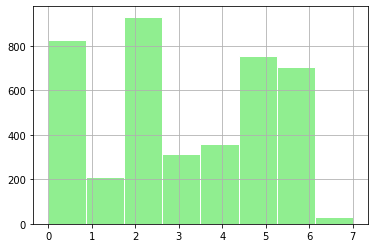

In [110]:
X_df['cluster'].hist(bins=8, edgecolor = "white", color='lightgreen')

### Inertia

Text(0, 0.5, 'inertia')

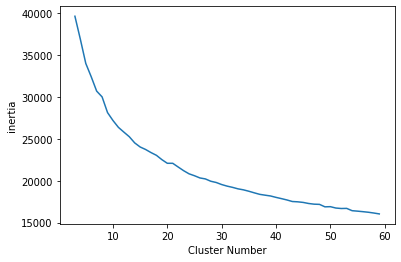

In [111]:
# I want to iterate over a range of n_clusters and for every value, I want to return the inertia
def get_kmeans_inertia_varying_cluster_n(n_clusters):
    
    # setup the model
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=1234,
                    n_init=3,
                   )
    # train the model
    kmeans.fit(X_stan_df)
    
    # return the resulting inertia
    return kmeans.inertia_

# Plot for a range of cluster numbers
import matplotlib.pyplot as plt

cluster_range = range(3,60)

plt.plot(cluster_range,
         [get_kmeans_inertia_varying_cluster_n(c_number) for c_number in cluster_range],
         ms=10,
        )
plt.xlabel('Cluster Number')
plt.ylabel('inertia')

Text(0, 0.5, 'inertia')

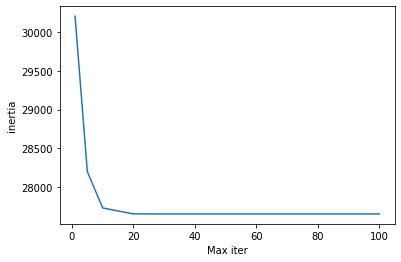

In [112]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=10,
                    random_state=25,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(X_stan_df)

    return kmeans.inertia_

max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')

### Silhouette score

In [113]:
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(3,50)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_stan)
    silhouettes.append(silhouette_score(X_stan, kmeans.predict(X_stan)))

Text(0, 0.5, 'silhouette score')

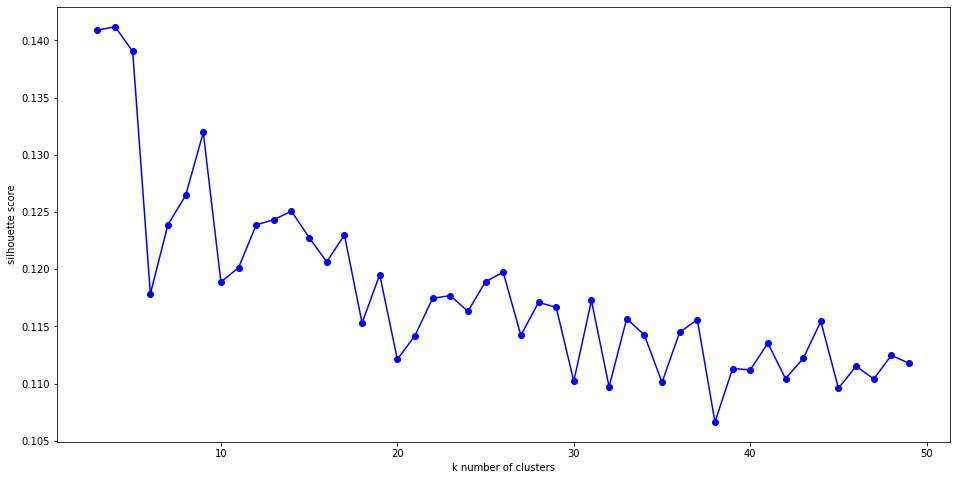

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k number of clusters')
plt.ylabel('silhouette score')

Larger silhouette score the best k! So in our case 4 clusters

#### Results visualization

In [115]:
k_opt=4
kmeans = KMeans(n_clusters=k_opt,random_state=25)

kmeans.fit(X_stan)

clusters = kmeans.predict(X_stan)
clusters

array([3, 3, 3, ..., 2, 2, 2])

In [117]:
df_clustered = pd.DataFrame(X_stan, columns=X_stan_df.columns)
df_clustered

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.769189,0.914784,0.221927,0.951121,-1.479852,-0.173436,-0.898320,-0.476416,-0.752672,1.701849,-0.571056,-0.295455,0.205623
1,1.102767,0.432936,0.785405,0.992709,0.675743,-0.560495,-0.227826,-0.475886,-0.351460,1.029293,-0.297587,-0.207199,0.205623
2,0.480089,0.914784,-1.468508,0.806073,0.675743,-0.512574,-0.860759,-0.476334,-0.563612,0.450040,-0.053822,-0.478718,0.205623
3,0.630199,0.413507,-1.468508,0.546407,0.675743,0.550303,0.027126,-0.476416,1.791704,-0.051460,-1.014130,-0.371224,0.205623
4,0.391135,-1.183585,1.067144,-0.776607,-1.479852,0.079688,1.853292,-0.475212,0.435088,-1.066125,0.341752,0.355974,0.205623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,-2.591046,-1.276846,1.067144,-1.044218,0.675743,-0.408129,2.010414,-0.442541,-0.521037,-1.706802,-1.419081,-0.505090,0.205623
4127,-2.277483,-2.164767,0.785405,-2.924433,0.675743,-0.467110,2.013378,1.311259,-0.628556,-1.735959,-1.526436,2.934894,-2.384095
4128,-2.494308,-1.750922,-1.186769,-2.488781,0.675743,-0.226273,2.001520,-0.476358,-0.697830,-1.702137,-1.415385,5.287753,2.795340
4129,-2.732816,-1.405080,-0.059812,-1.391455,0.675743,-0.383554,2.019308,0.992630,-0.711540,-1.708357,-1.434789,2.283556,-7.563530


In [118]:
df_clustered['cluster_id'] = clusters

In [119]:
df_clustered['cluster_id'].value_counts()

3    2210
1    1147
0     391
2     383
Name: cluster_id, dtype: int64

<AxesSubplot:>

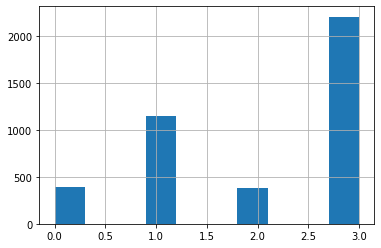

In [120]:
df_clustered['cluster_id'].hist()

In [121]:
#dataframe with spotify audio features and clusters
df_clustered

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_id
0,0.769189,0.914784,0.221927,0.951121,-1.479852,-0.173436,-0.898320,-0.476416,-0.752672,1.701849,-0.571056,-0.295455,0.205623,3
1,1.102767,0.432936,0.785405,0.992709,0.675743,-0.560495,-0.227826,-0.475886,-0.351460,1.029293,-0.297587,-0.207199,0.205623,3
2,0.480089,0.914784,-1.468508,0.806073,0.675743,-0.512574,-0.860759,-0.476334,-0.563612,0.450040,-0.053822,-0.478718,0.205623,3
3,0.630199,0.413507,-1.468508,0.546407,0.675743,0.550303,0.027126,-0.476416,1.791704,-0.051460,-1.014130,-0.371224,0.205623,3
4,0.391135,-1.183585,1.067144,-0.776607,-1.479852,0.079688,1.853292,-0.475212,0.435088,-1.066125,0.341752,0.355974,0.205623,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,-2.591046,-1.276846,1.067144,-1.044218,0.675743,-0.408129,2.010414,-0.442541,-0.521037,-1.706802,-1.419081,-0.505090,0.205623,2
4127,-2.277483,-2.164767,0.785405,-2.924433,0.675743,-0.467110,2.013378,1.311259,-0.628556,-1.735959,-1.526436,2.934894,-2.384095,2
4128,-2.494308,-1.750922,-1.186769,-2.488781,0.675743,-0.226273,2.001520,-0.476358,-0.697830,-1.702137,-1.415385,5.287753,2.795340,2
4129,-2.732816,-1.405080,-0.059812,-1.391455,0.675743,-0.383554,2.019308,0.992630,-0.711540,-1.708357,-1.434789,2.283556,-7.563530,2


In [122]:
kmeans.cluster_centers_

array([[ 1.00853679e+00,  1.87957704e-01,  2.64342281e-02,
         4.15832498e-01, -2.75577993e-01,  2.70542704e+00,
        -3.92375452e-01, -4.36069441e-01,  7.32480219e-02,
         2.84482050e-01,  1.24447508e-01, -4.13582150e-01,
         1.92409865e-01],
       [-1.21168714e-02, -7.09216748e-01, -2.83442042e-02,
        -2.41885253e-01,  1.65999631e-01, -3.70234890e-01,
         6.55058324e-01, -8.38285759e-02, -2.05370525e-01,
        -4.52825653e-01, -2.56770572e-01,  6.01202780e-02,
        -5.87725557e-02],
       [-1.55189586e+00, -1.91420021e+00,  6.81839264e-02,
        -2.42031610e+00, -7.28053718e-02, -3.58305040e-01,
         1.86551443e+00,  1.97689488e+00, -4.44637392e-01,
        -1.31766914e+00, -5.53028237e-01, -1.32451351e-01,
        -9.37098693e-01],
       [ 9.63419129e-02,  6.66163644e-01, -1.80733178e-03,
         4.71120012e-01, -2.45812426e-02, -2.25795197e-01,
        -5.93383570e-01, -2.21784602e-01,  1.70559963e-01,
         4.12709736e-01,  2.06916501e

In [123]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=X_stan_df.columns)
cluster_centers_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.008537,0.187958,0.026434,0.415832,-0.275578,2.705427,-0.392375,-0.436069,0.073248,0.284482,0.124448,-0.413582,0.192410
1,-0.012117,-0.709217,-0.028344,-0.241885,0.166000,-0.370235,0.655058,-0.083829,-0.205371,-0.452826,-0.256771,0.060120,-0.058773
2,-1.551896,-1.914200,0.068184,-2.420316,-0.072805,-0.358305,1.865514,1.976895,-0.444637,-1.317669,-0.553028,-0.132451,-0.937099
3,0.096342,0.666164,-0.001807,0.471120,-0.024581,-0.225795,-0.593384,-0.221785,0.170560,0.412710,0.206917,0.065138,0.158750


C:\Users\maria\.conda\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


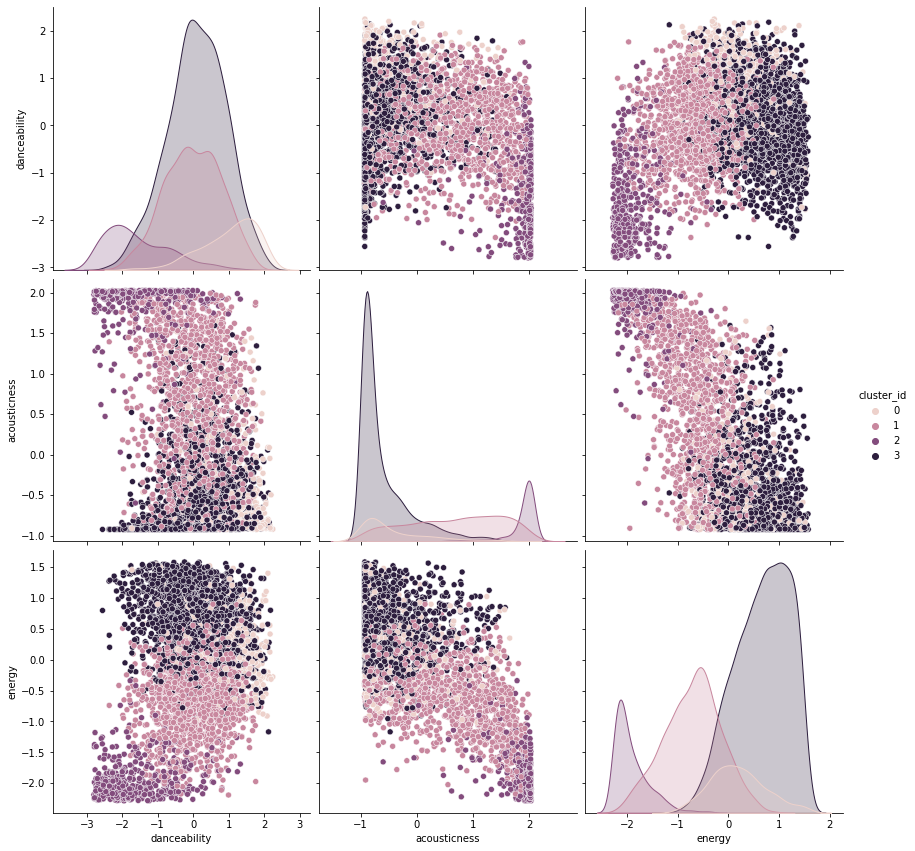

In [124]:
#plot some features of df_clustered and the clusters
import seaborn as sns
sns.pairplot(df_clustered.dropna(), hue='cluster_id',size=4,vars=["danceability","acousticness","energy"],kind='scatter')

# Second prototype

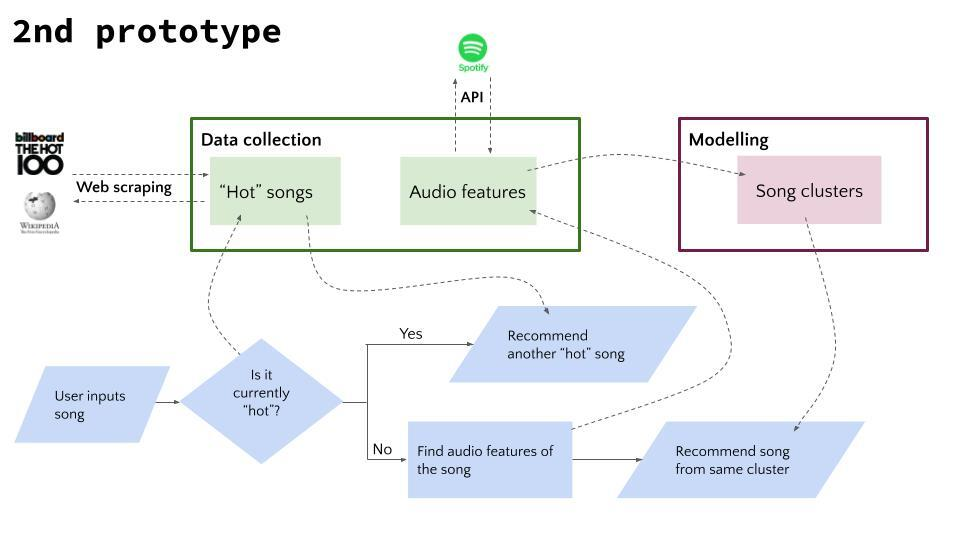

In [125]:
img = Image(filename='gnod_2nd_iteration.jpg')
display(img)

In [135]:
#find audio features of a song giving the name 'Richer'
song="Richer"
x=sp.search(song, limit=1)
song_info=sp.audio_features([x["tracks"]["items"][0]["id"]])
#remove features not used in the model
remove_list = ['id', 'type', 'uri', 'track_href', 'analysis_url'] 
[song_info[0].pop(key) for key in remove_list] 

['7HsjuVBM93Z2RoxjpWLgTT',
 'audio_features',
 'spotify:track:7HsjuVBM93Z2RoxjpWLgTT',
 'https://api.spotify.com/v1/tracks/7HsjuVBM93Z2RoxjpWLgTT',
 'https://api.spotify.com/v1/audio-analysis/7HsjuVBM93Z2RoxjpWLgTT']

In [137]:
song_info[0]

{'danceability': 0.726,
 'energy': 0.411,
 'key': 1,
 'loudness': -12.929,
 'mode': 1,
 'speechiness': 0.0671,
 'acousticness': 0.438,
 'instrumentalness': 0,
 'liveness': 0.087,
 'valence': 0.734,
 'tempo': 137.905,
 'duration_ms': 190459,
 'time_signature': 3}

In [144]:
song_list=list(song_info[0].values())
song_list

[0.726,
 0.411,
 1,
 -12.929,
 1,
 0.0671,
 0.438,
 0,
 0.087,
 0.734,
 137.905,
 190459,
 3]

In [145]:
song_array = np.array(song_list).reshape(1, -1)
song_array

array([[ 7.26000e-01,  4.11000e-01,  1.00000e+00, -1.29290e+01,
         1.00000e+00,  6.71000e-02,  4.38000e-01,  0.00000e+00,
         8.70000e-02,  7.34000e-01,  1.37905e+02,  1.90459e+05,
         3.00000e+00]])

In [146]:
#standardizing this song 
scaler = StandardScaler().fit(X.drop(['cluster'], axis=1))
scaled_song = scaler.transform(song_array)
scaled_song

array([[ 0.90262033, -0.6939659 , -1.18676907, -0.59436675,  0.67574334,
        -0.08742303,  0.37397877, -0.47641592, -0.61123746,  0.9981925 ,
         0.62425543, -0.48715895, -2.38409503]])

In [147]:
# predict the cluster with kmeans
cluster_pred = kmeans.predict(scaled_song)[0]
cluster_pred

1

In [148]:
#get a random song from the same cluster
index_song = df_clustered[df_clustered['cluster_id']==cluster_pred].sample().index[0]
index_song

3449

In [149]:
#get the id of random song
id_song = df.iloc[index_song]['id']
id_song

'4Eq60oypgAxlX6Kp7MFQl6'

In [150]:
#look for the name of the song
song_name=sp.track(id_song)["name"]
song_name

'Till It Happens To You'

In [151]:
#get the artist of the song
song_artist=sp.track(id_song)["artists"][0]["name"]
song_artist

'Corinne Bailey Rae'

In [152]:
#get a random song from the same cluster: put it together
def get_random_song_cluster(song):
    x=sp.search(song, limit=1)
    song_info=sp.audio_features([x["tracks"]["items"][0]["id"]])
    #remove features not used in the model
    remove_list = ['id', 'type', 'uri', 'track_href', 'analysis_url'] 
    [song_info[0].pop(key) for key in remove_list] 
    song_list=list(song_info[0].values())
    #get song_array
    song_array = np.array(song_list).reshape(1, -1)
    #get song_array scaled 
    scaled_song = scaler.transform(song_array)
    #predict cluster
    cluster_pred = kmeans.predict(scaled_song)[0]
    #get a random song from the same cluster
    index_song = df_clustered[df_clustered['cluster_id']==cluster_pred].sample().index[0]
    #get the id of random song
    id_song = df.iloc[index_song]['id']
    
    return print(sp.track(id_song)["name"], " by ", sp.track(id_song)["artists"][0]["name"])

In [153]:
#test the function
get_random_song_cluster("Rapstar")

It Was You (With Zeeba)  by  GoldFish


# 2nd Prototype: Song Recommender

In [170]:
#prototype 2
while True:
    #ask the user for a song
    user_song = input(">> Enter a song you like: ")
    if user_song =='!':
        print("Thank you for using our music recommendation system! Bye :)")
        break
    if validate_input(user_song):
        #apply the recommendation function
        result = recommend_100(user_song,data_100)
        if result =="***":
            print("You're gonna like this song: ") 
            get_random_song_cluster(user_song)
        else:
            print("Recommended for you: ", result)
    else:
        print("That's not a song, try again!")

>> Enter a song you like:  
That's not a song, try again!
>> Enter a song you like: ,
That's not a song, try again!
>> Enter a song you like: ALL STAR
You're gonna like this song: 
Dog Days Are Over  by  Florence + The Machine
>> Enter a song you like: californication
You're gonna like this song: 
I'll Take You There  by  The Staple Singers
>> Enter a song you like: rapstar
Recommended for you:  What'S Next by Rod Wave
>> Enter a song you like: where is my mind
You're gonna like this song: 
Coming Home  by  Leon Bridges
>> Enter a song you like: where is my mind
You're gonna like this song: 
Never Going Back Again - 2004 Remaster  by  Fleetwood Mac
>> Enter a song you like: do i wanna know
You're gonna like this song: 
I Don't Know  by  Nick Hakim
>> Enter a song you like: born slippy
You're gonna like this song: 
Traffic - Radio Edit  by  Tiësto
>> Enter a song you like: creep
You're gonna like this song: 
Ripples  by  Maximillian
>> Enter a song you like: friday i'm in love
You're go

#### test the prototype

- HOT SONGS : way less sad, rapstar, peaches, save your tears
- my songs: born slippy, where is my mind, do i wanna know, ... 